In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general para publicación
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300
})

#Cargar el CSV en un DataFrame llamado "data"
df = pd.read_csv('data.csv',sep=';', na_values='NAN', keep_default_na=True)

#Mostrar las primeras 5 filas para inspeccionar la estructura
df.head()

Facultad        Carrera        Día  H_Inicio  H_Salida Profesor  Semestre  \
0      ICA          CIVIL     JUEVES       7.0       9.0   DOC_05    2020.0   
1      ICA          CIVIL  MIERCOLES       7.0       9.0   DOC_05    2020.0   
2      ICA    COMPUTACION     JUEVES      11.0      13.0   DOC_11    2020.0   
3     FILO  P INFORMATICA    VIERNES       8.0      10.0   DOC_11    2020.0   
4      ARQ   ARQUITECTURA     MARTES       7.0       9.0   DOC_12    2020.0   

   Total Estudiantes  Entrada  Salida  Proyecto  
0                 63        7      15         1  
1                 68        7      15         1  
2                 17        7      15         1  
3                  6        7      15         1  
4                 19        7      15         1

In [126]:
#Mostrar dimensiones del DataFrame
df.shape

(758, 11)

In [127]:
#Revisar tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Facultad           758 non-null    object 
 1   Carrera            758 non-null    object 
 2   Día                750 non-null    object 
 3   H_Inicio           750 non-null    float64
 4   H_Salida           750 non-null    float64
 5   Profesor           755 non-null    object 
 6   Semestre           757 non-null    float64
 7   Total Estudiantes  758 non-null    int64  
 8   Entrada            758 non-null    int64  
 9   Salida             758 non-null    int64  
 10  Proyecto           758 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 65.3+ KB


In [128]:
#Calcular y mostrar porcentaje de valores faltantes por columna
missing_pct = (df.isnull().mean() * 100).round(2).to_frame("Porcentaje faltante")
print("Porcentaje de valores faltantes", missing_pct)

Porcentaje de valores faltantes                    Porcentaje faltante
Facultad                          0.00
Carrera                           0.00
Día                               1.06
H_Inicio                          1.06
H_Salida                          1.06
Profesor                          0.40
Semestre                          0.13
Total Estudiantes                 0.00
Entrada                           0.00
Salida                            0.00
Proyecto                          0.00


In [129]:
#Total de valores nulos en cada variable
df.isnull().sum()

Facultad             0
Carrera              0
Día                  8
H_Inicio             8
H_Salida             8
Profesor             3
Semestre             1
Total Estudiantes    0
Entrada              0
Salida               0
Proyecto             0
dtype: int64

In [130]:
# eliminar los valores nulos
df = df.dropna()
df.shape

(749, 11)

In [131]:
df = df.drop_duplicates()
df.shape

(747, 11)

In [132]:
df

Facultad        Carrera        Día  H_Inicio  H_Salida Profesor  Semestre  \
0        ICA          CIVIL     JUEVES       7.0       9.0   DOC_05    2020.0   
1        ICA          CIVIL  MIERCOLES       7.0       9.0   DOC_05    2020.0   
2        ICA    COMPUTACION     JUEVES      11.0      13.0   DOC_11    2020.0   
3       FILO  P INFORMATICA    VIERNES       8.0      10.0   DOC_11    2020.0   
4        ARQ   ARQUITECTURA     MARTES       7.0       9.0   DOC_12    2020.0   
..       ...            ...        ...       ...       ...      ...       ...   
753      ICA          CIVIL     JUEVES       7.0       9.0   DOC_09    2324.0   
754      ICA          CIVIL     JUEVES       9.0      11.0   DOC_09    2324.0   
755     FILO   P MATEMATICA      LUNES       7.0       9.0   DOC_09    2324.0   
756      ICA          CIVIL    VIERNES       9.0      11.0   DOC_09    2324.0   
757      ARQ   ARQUITECTURA    VIERNES      11.0      13.0   DOC_09    2324.0   

     Total Estudiantes  Entrada  Salida  Proyecto  
0                   63        7      15         1  
1                   68        7      15         1  
2                   17        7      15         1  
3                    6        7      15         1  
4                   19        7      15         1  
..                 ...      ...     ...       ...  
753                 53        7      15         1  
754                 43        7      15         1  
755                 50        7      15         1  
756                 47        7      15         1  
757                 50        7      15         1  

[747 rows x 11 columns]

In [133]:
num_df = df.select_dtypes(include='number')
df[num_df.columns] = df[num_df.columns].astype(int)

In [134]:
#guardar df
df.to_csv('data_limpia.csv', index=False)

In [135]:
df.nunique()

Facultad              8
Carrera              20
Día                   5
H_Inicio             12
H_Salida             12
Profesor             14
Semestre             10
Total Estudiantes    74
Entrada               3
Salida                3
Proyecto              2
dtype: int64

DF limpio de nulos y sin valores duplicados en todas las etiquetas

In [136]:
#Métricas de variables numericas
df.describe()

H_Inicio    H_Salida     Semestre  Total Estudiantes     Entrada  \
count  747.000000  747.000000   747.000000         747.000000  747.000000   
mean    11.327979   13.330656  2223.722892          37.364123    8.420348   
std      3.414730    3.414864   145.820851          14.656430    2.189425   
min      7.000000    9.000000  2020.000000           4.000000    7.000000   
25%      9.000000   11.000000  2121.000000          27.000000    7.000000   
50%     11.000000   13.000000  2223.000000          38.000000    7.000000   
75%     14.000000   16.000000  2324.000000          46.000000   12.000000   
max     18.000000   20.000000  2425.000000          79.000000   12.000000   

           Salida    Proyecto  
count  747.000000  747.000000  
mean    16.420348    0.566265  
std      2.189425    0.495922  
min     15.000000    0.000000  
25%     15.000000    0.000000  
50%     15.000000    1.000000  
75%     20.000000    1.000000  
max     20.000000    1.000000

In [137]:
#Métricas de variables categoricas
df.describe(include='object')

Facultad       Carrera     Día Profesor
count       747           747     747      747
unique        8            20       5       14
top        FILO  P MATEMATICA  MARTES   DOC_04
freq        208           135     170       66

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 757
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Facultad           747 non-null    object
 1   Carrera            747 non-null    object
 2   Día                747 non-null    object
 3   H_Inicio           747 non-null    int64 
 4   H_Salida           747 non-null    int64 
 5   Profesor           747 non-null    object
 6   Semestre           747 non-null    int64 
 7   Total Estudiantes  747 non-null    int64 
 8   Entrada            747 non-null    int64 
 9   Salida             747 non-null    int64 
 10  Proyecto           747 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 70.0+ KB


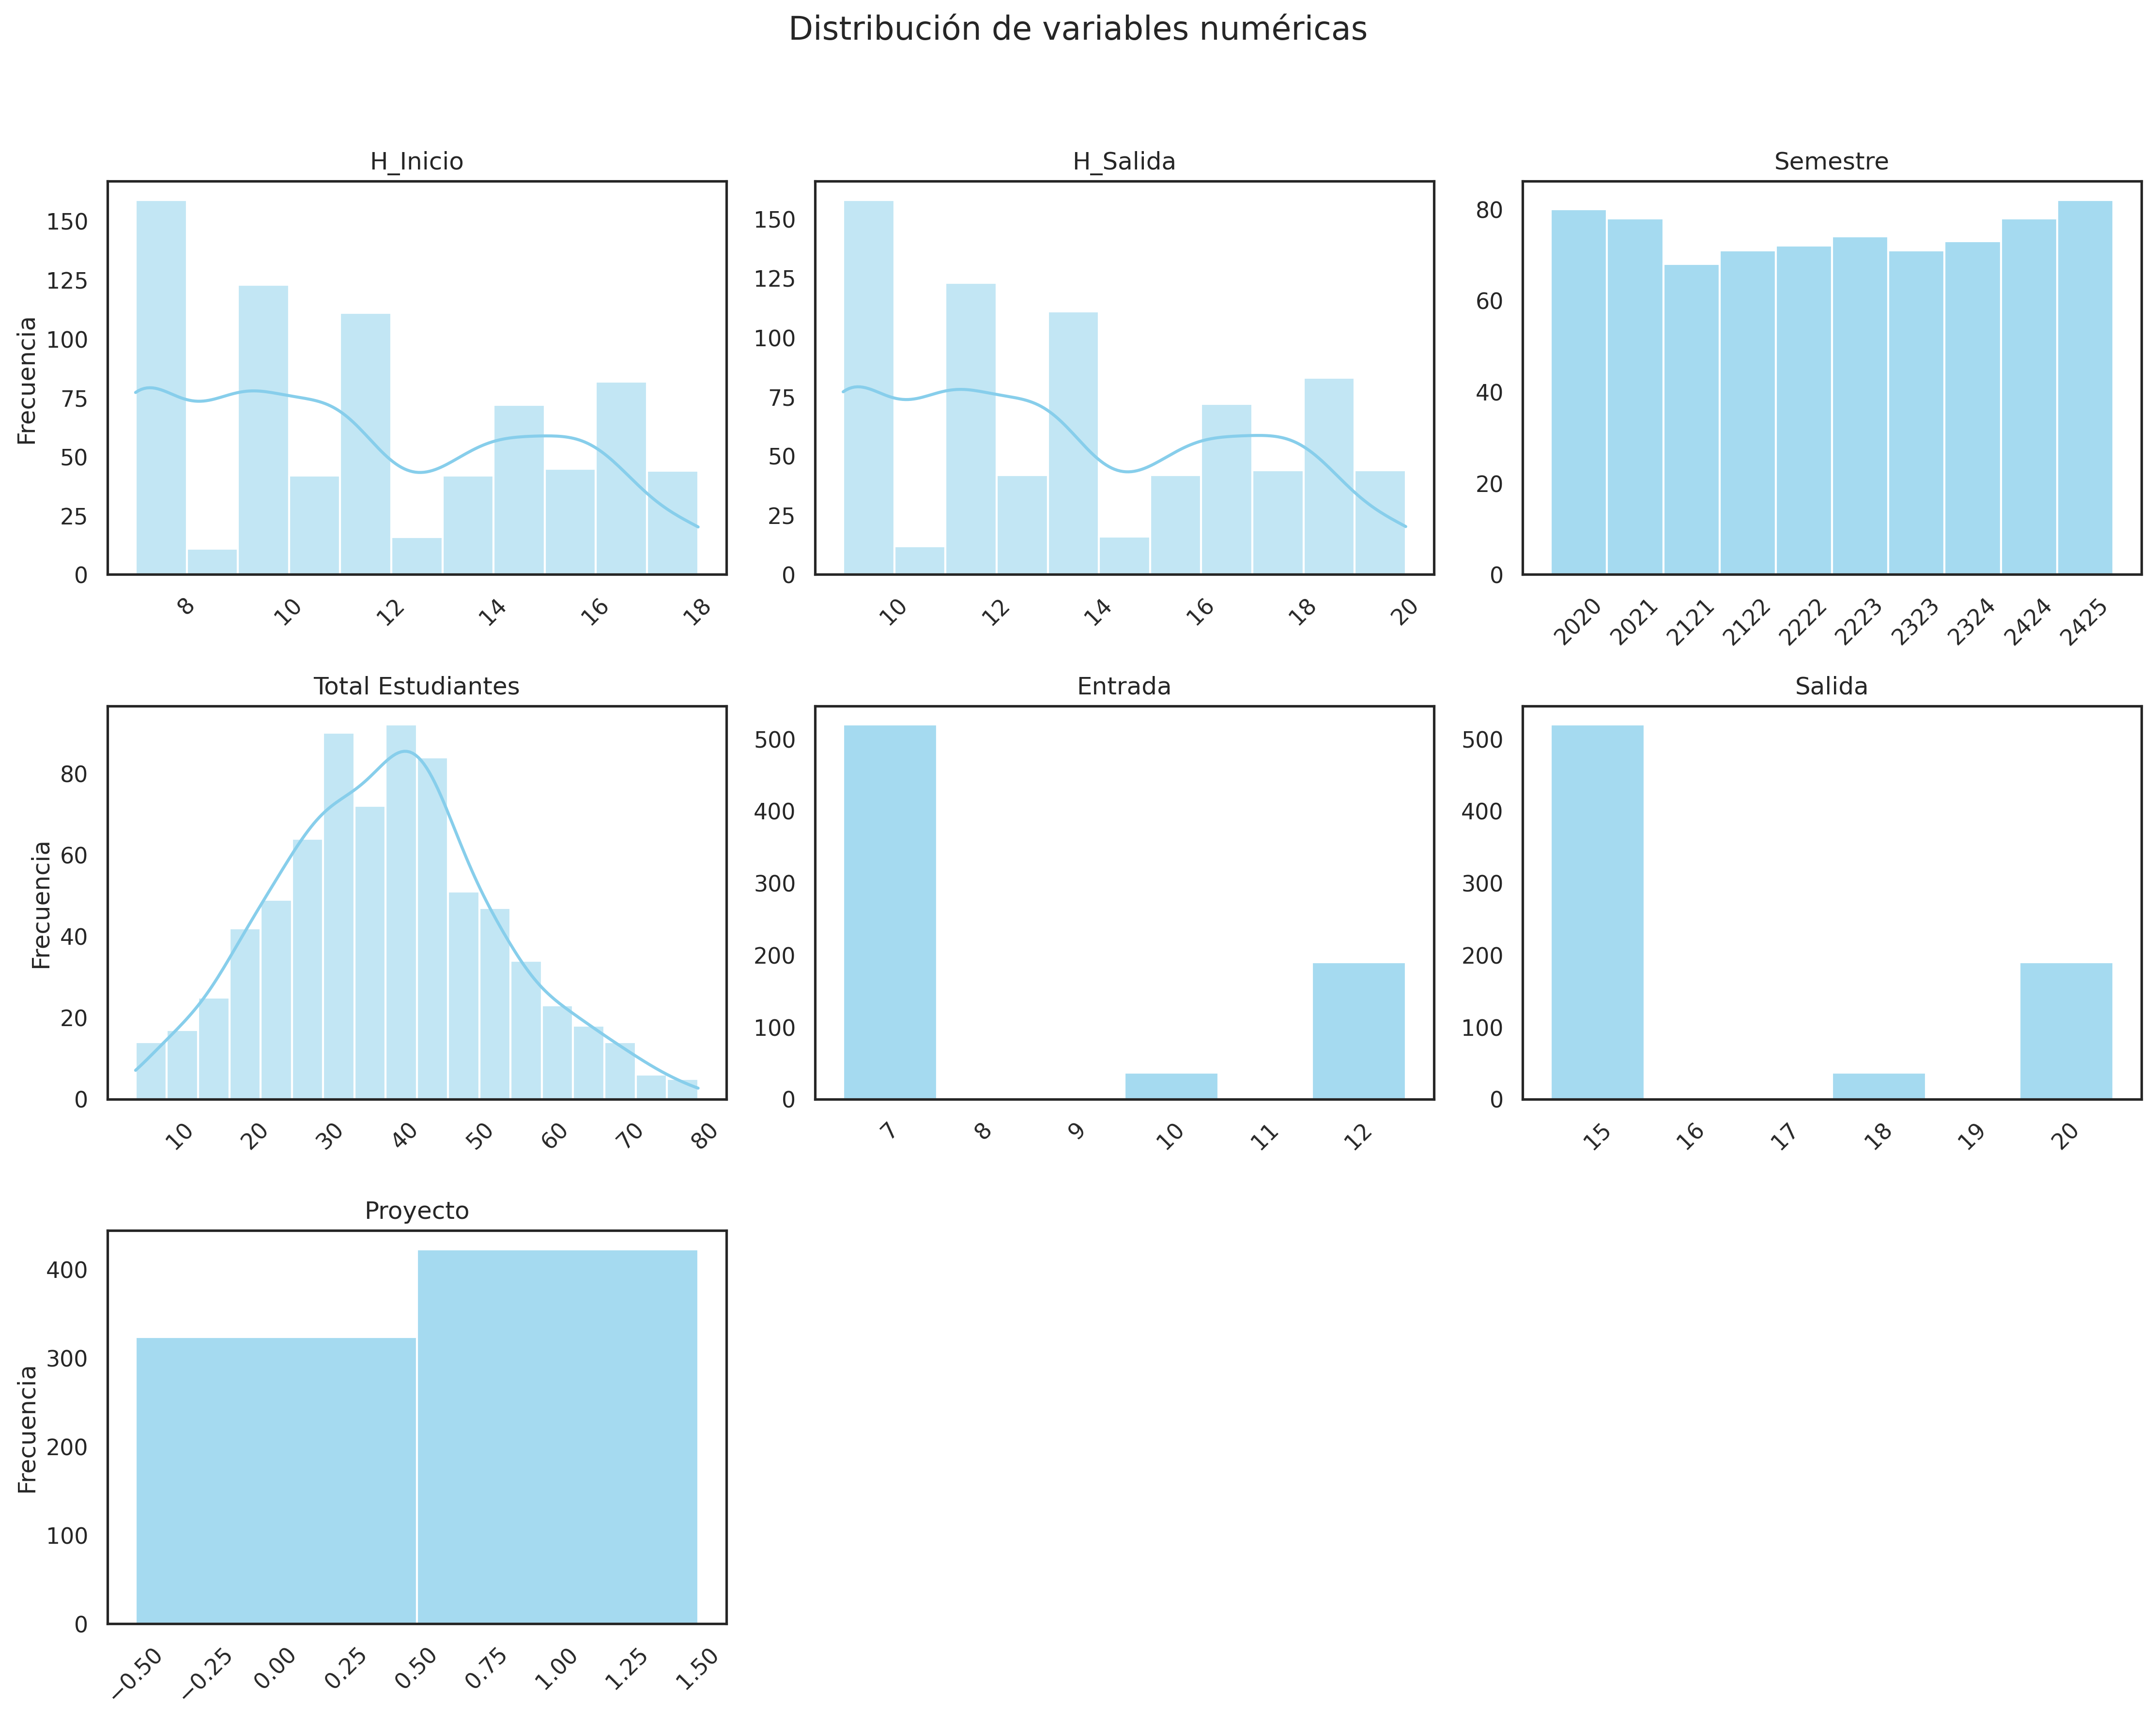

In [162]:
import numpy as np

df_1 = pd.read_csv('data_limpia.csv')

num_df = df_1.select_dtypes(include='number')

# Convertir 'Semestre' a string para evitar agrupación errónea
if 'Semestre' in num_df.columns:
    num_df['Semestre'] = df_1['Semestre'].astype(str)

cols = num_df.columns
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
fig.suptitle("Distribución de variables numéricas", fontsize=16)
axes = axes.ravel()

sns.set(style="white")

for i, col in enumerate(cols):
    data = num_df[col].dropna()

    # Mostrar como variable discreta si es tipo entero o string (como 'Semestre')
    is_discrete = pd.api.types.is_integer_dtype(data) or pd.api.types.is_object_dtype(data)

    # Mostrar KDE solo para columnas específicas
    kde_cols = ['Total Estudiantes', 'H_Inicio', 'H_Salida']
    # kde = (col in kde_cols or is_discrete)
    sns.histplot(
        data=data,
        kde=(col in kde_cols),
        discrete=not col in kde_cols,
        ax=axes[i],
        color='skyblue'
    )

    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia" if i % n_cols == 0 else "")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(False)

# Eliminar ejes vacíos si hay menos columnas que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



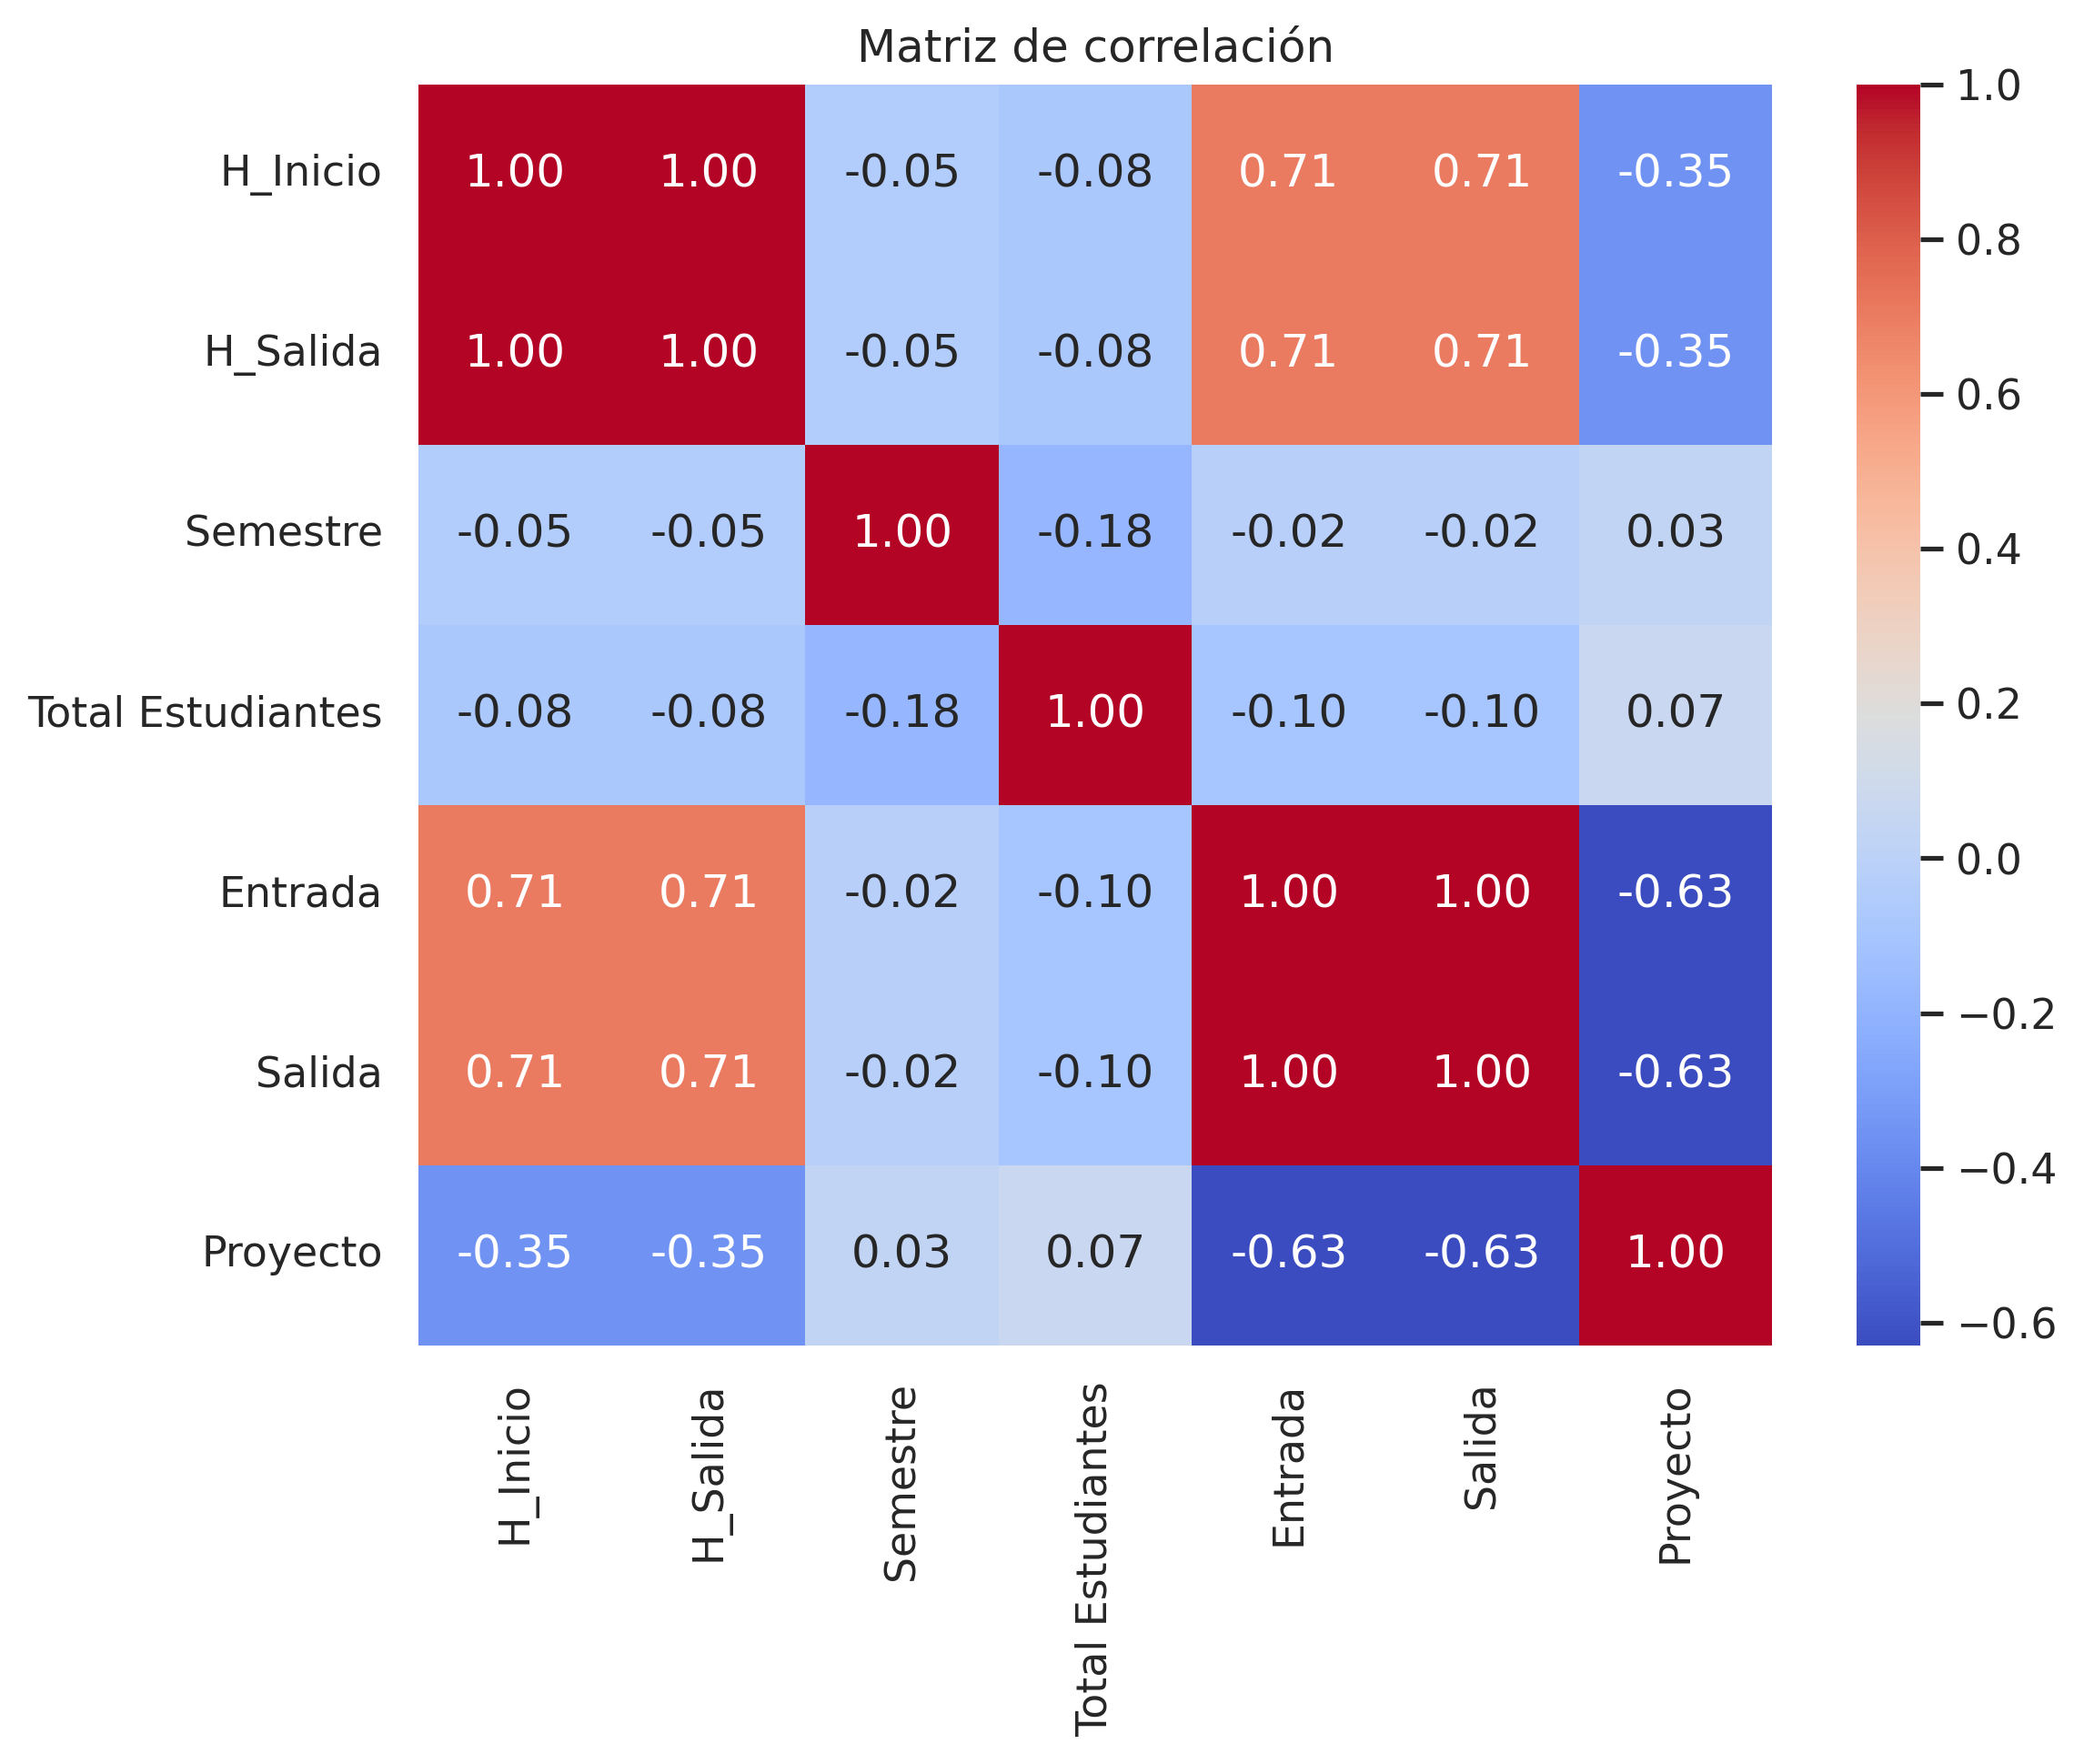

In [165]:
num_df = df_1.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

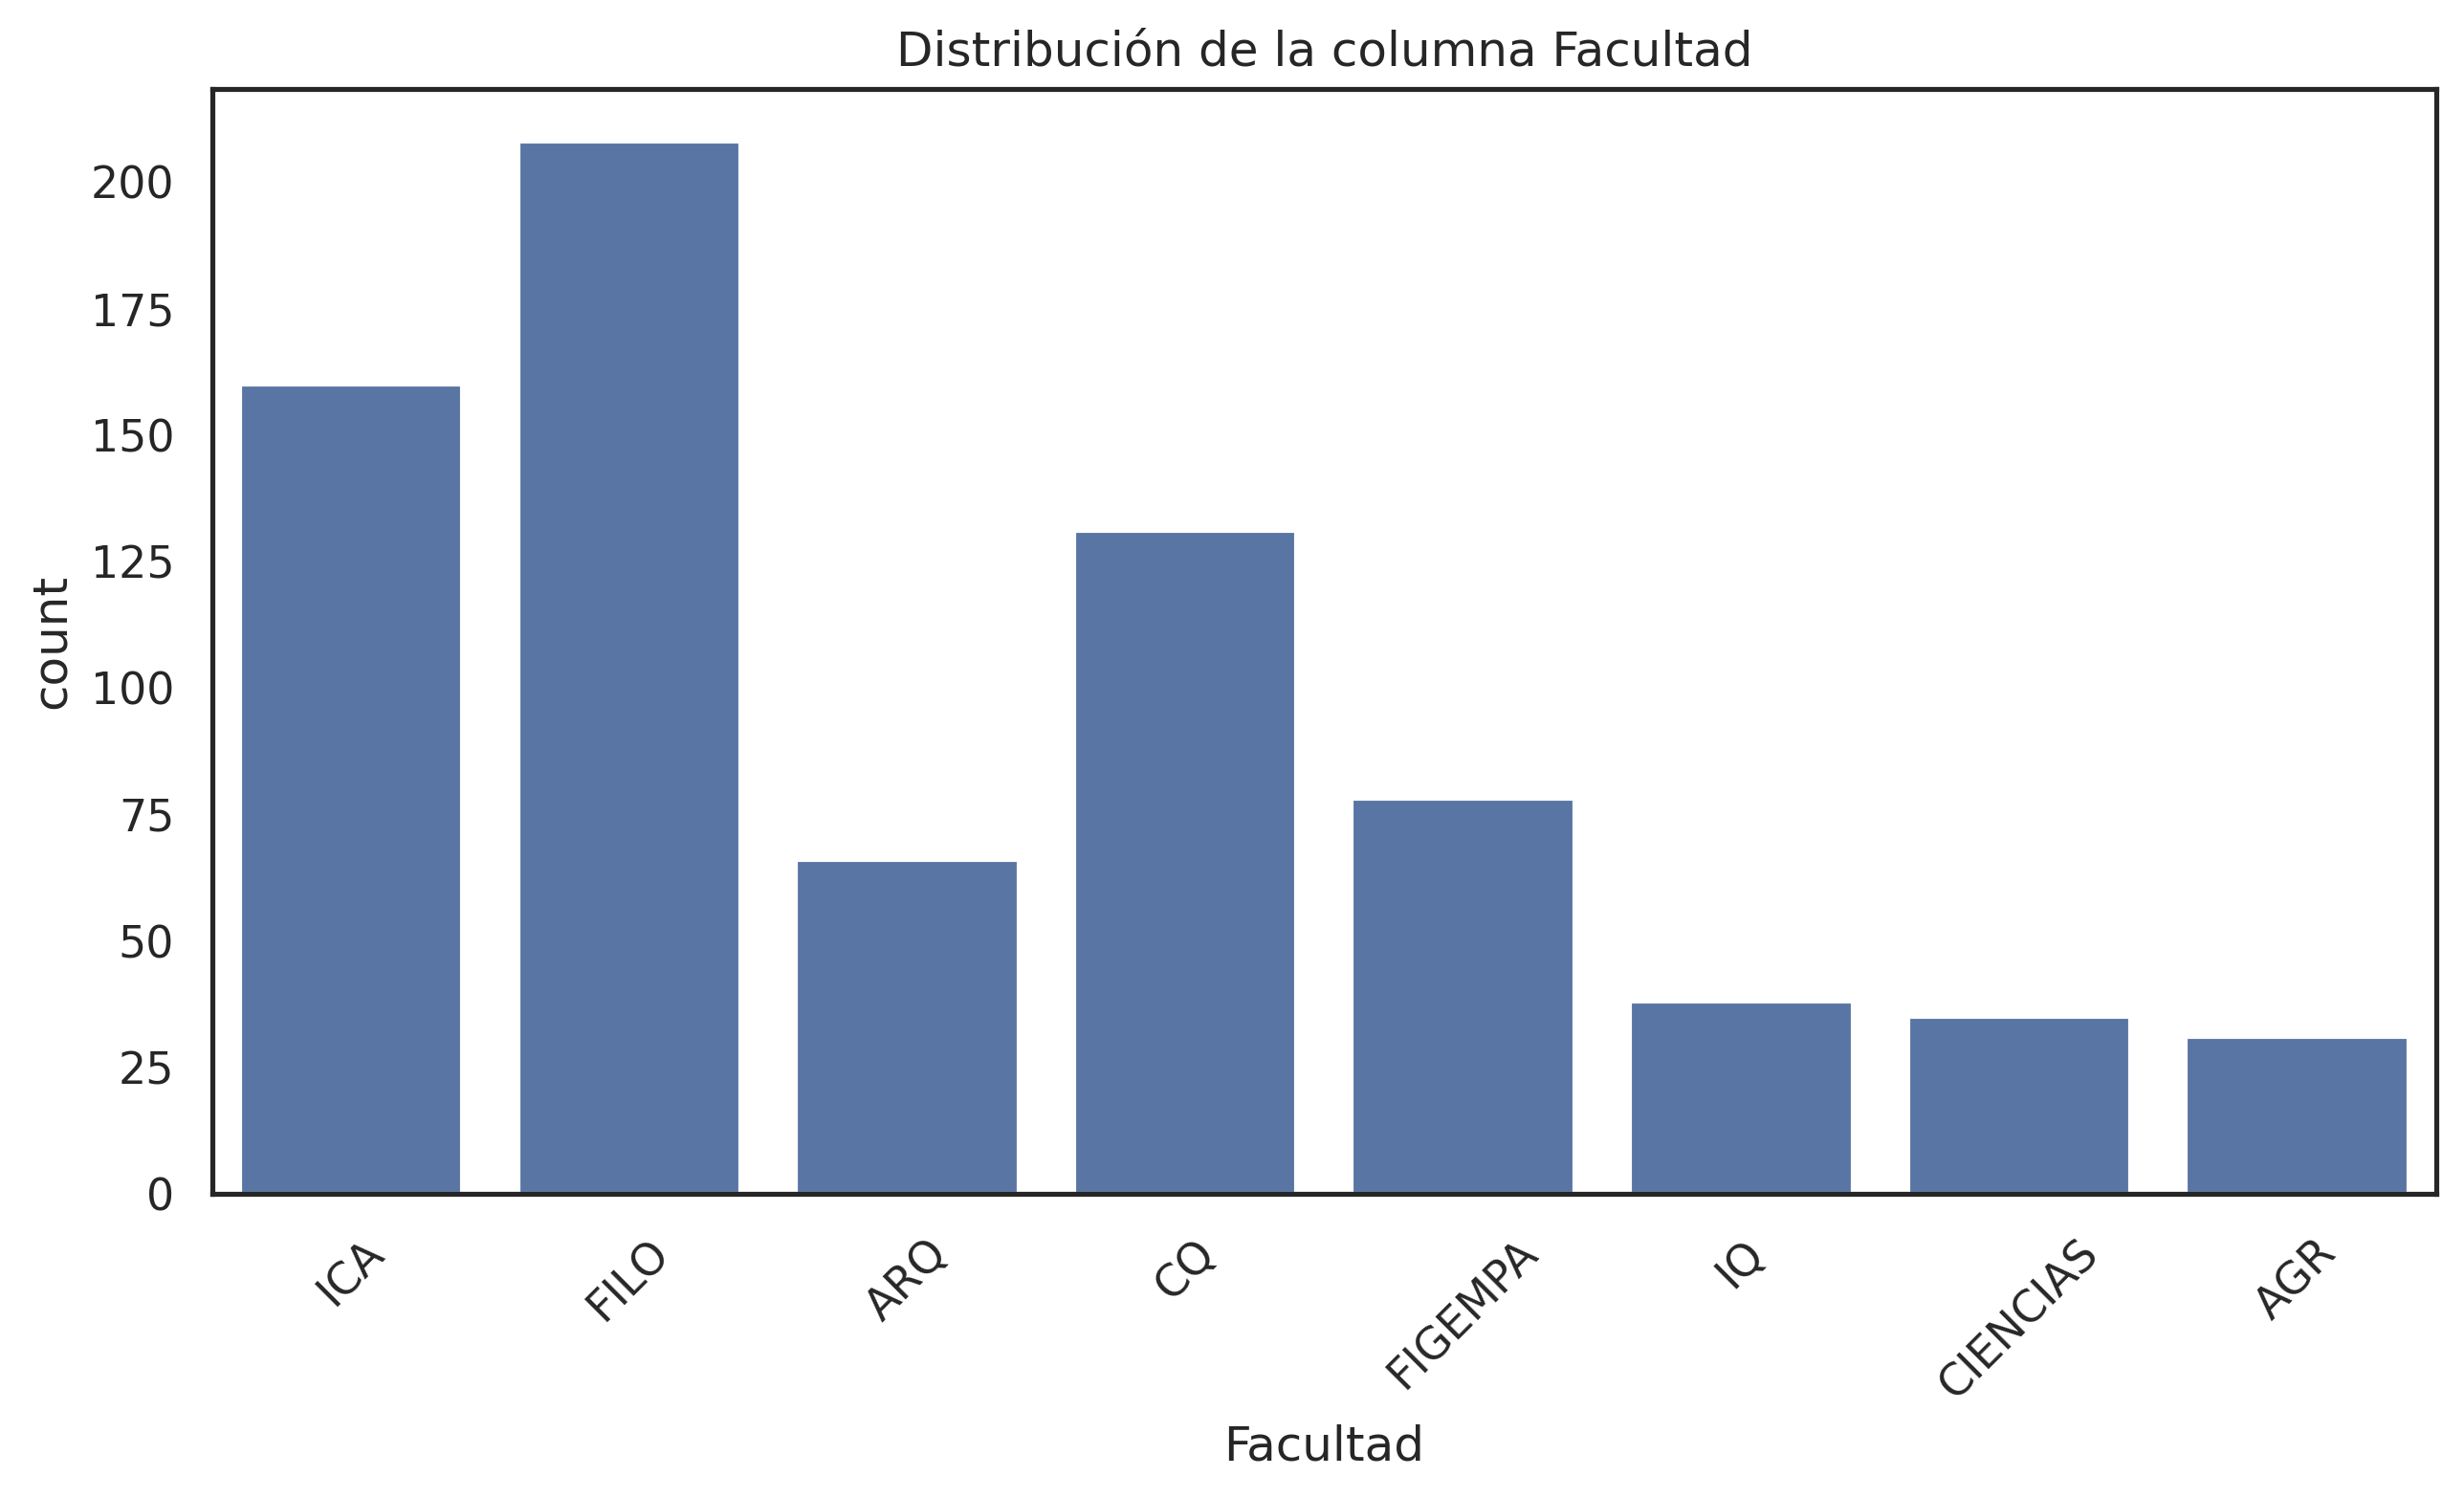

In [166]:
columna = 'Facultad'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_1, x=columna)
plt.title(f"Distribución de la columna {columna}")
plt.xticks(rotation=45)
plt.show()

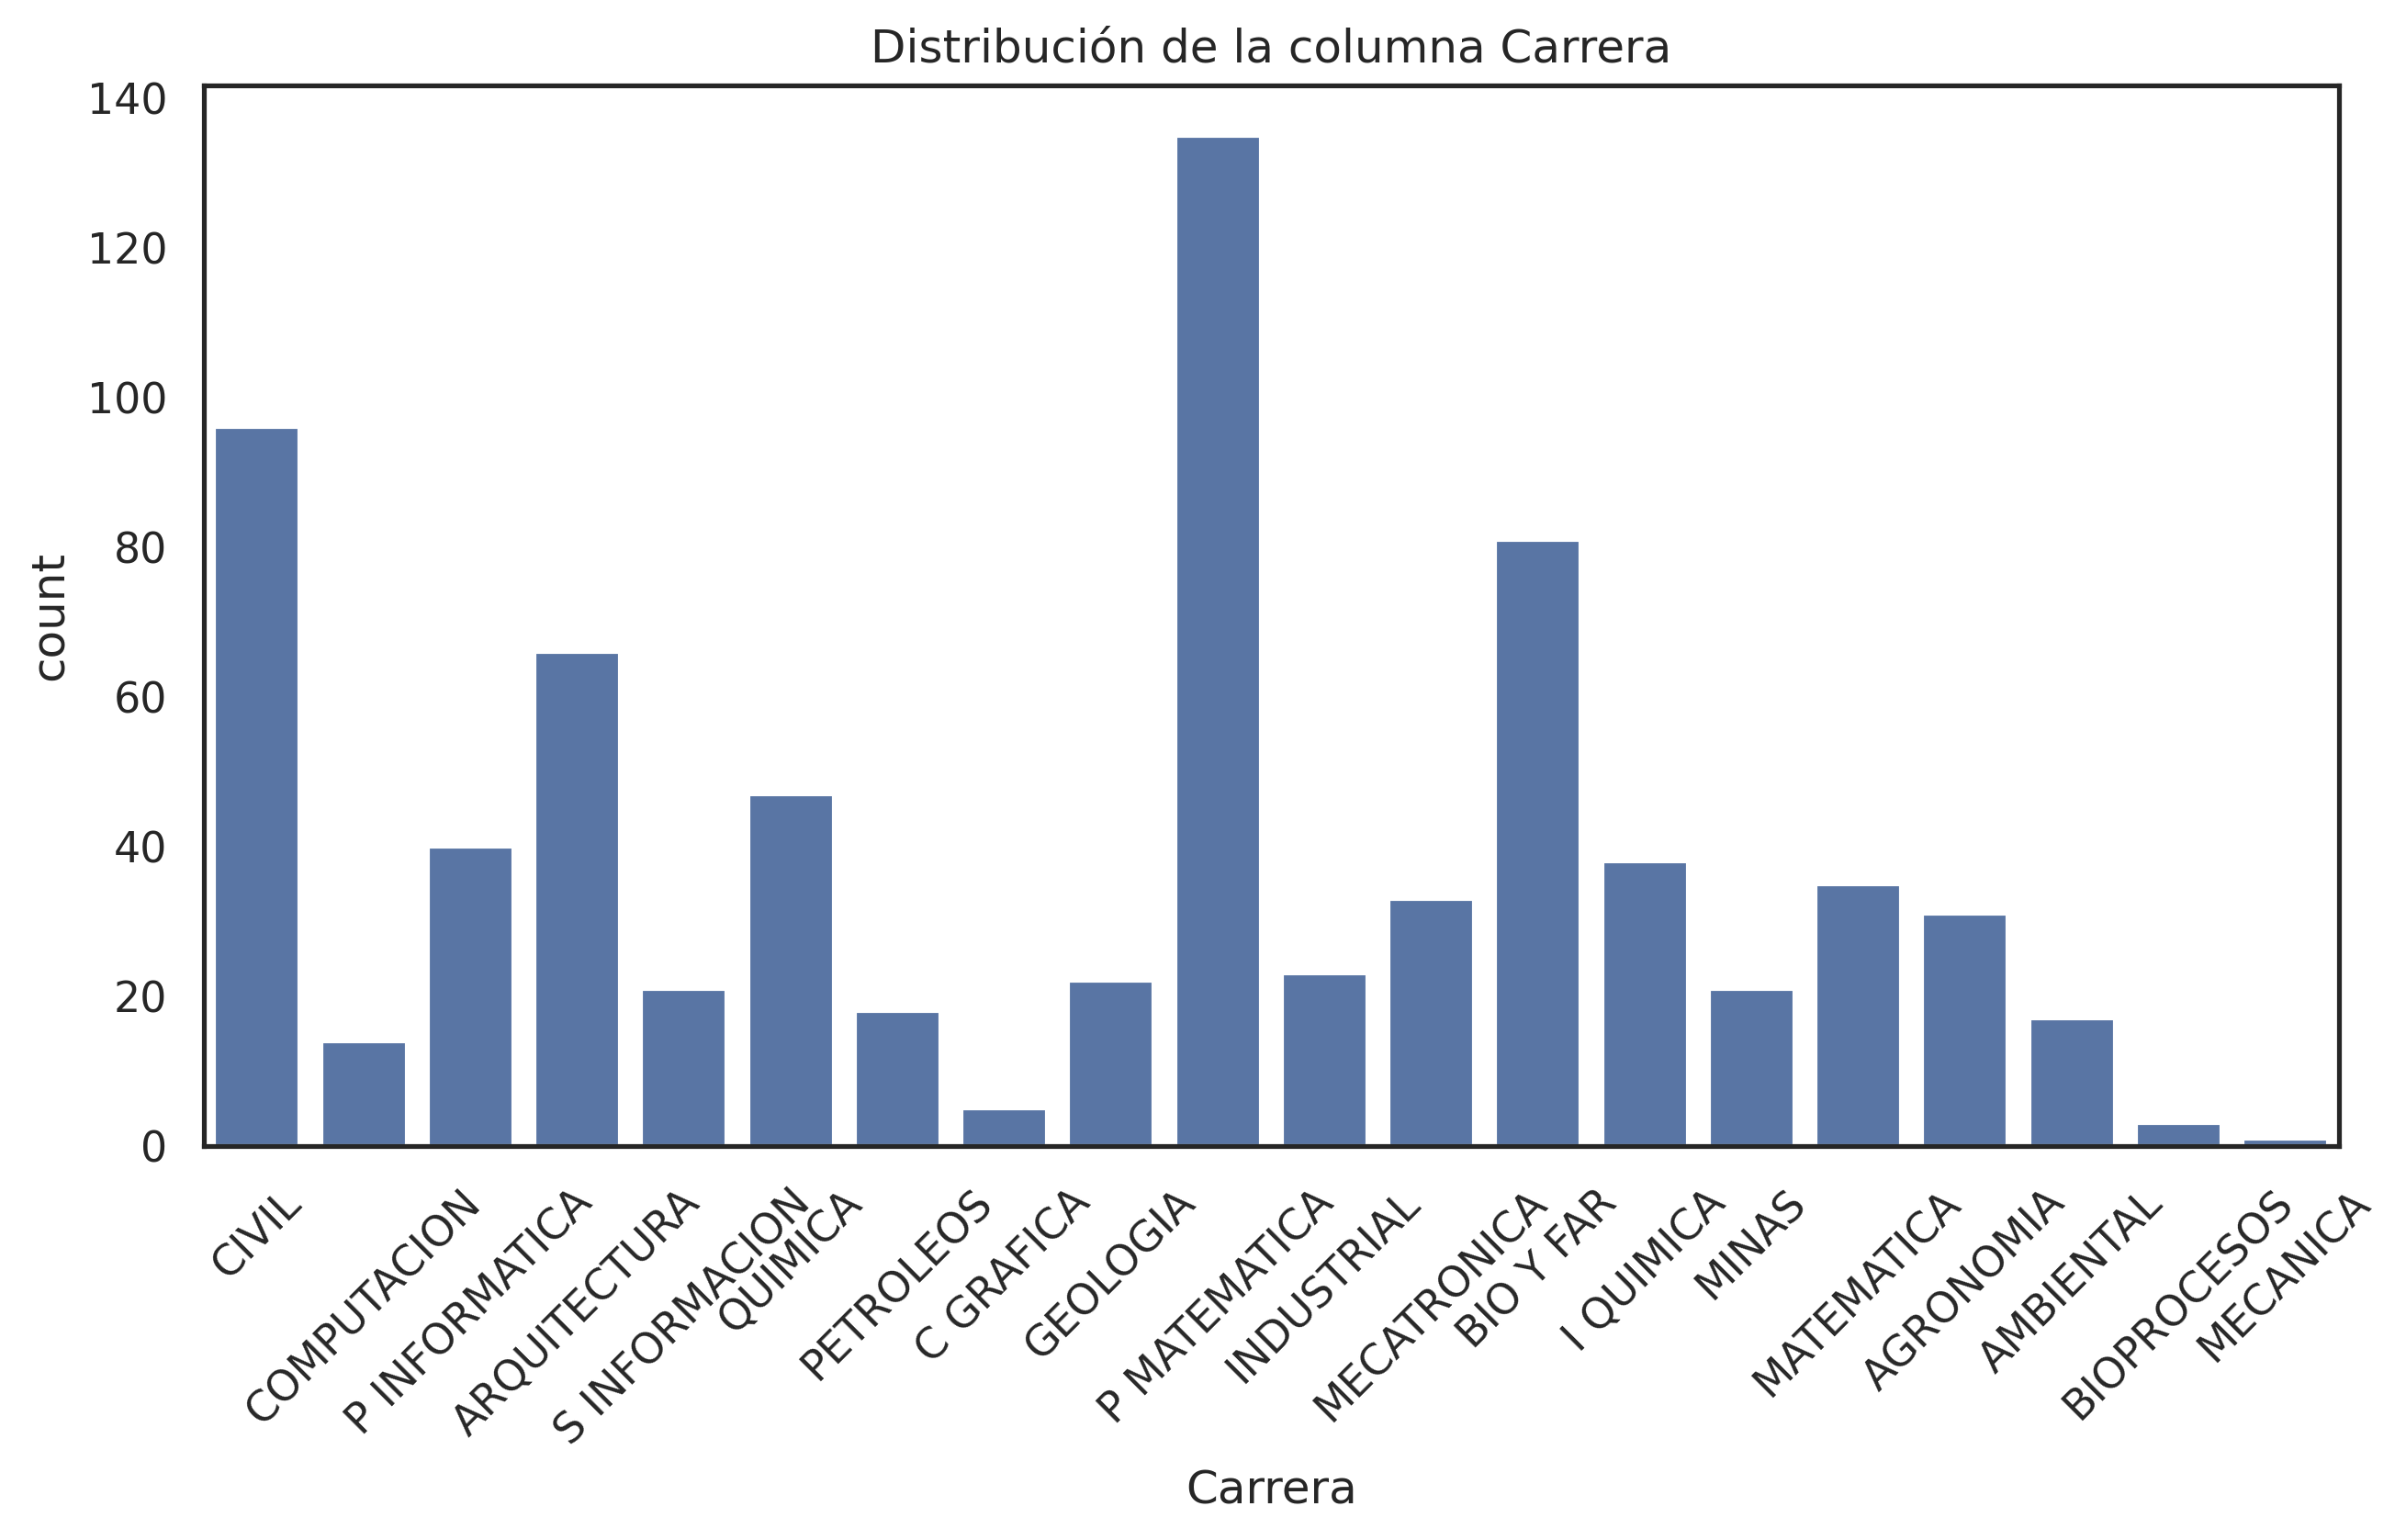

In [167]:
columna = 'Carrera'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_1, x=columna)
plt.title(f"Distribución de la columna {columna}")
plt.xticks(rotation=45)
plt.show()

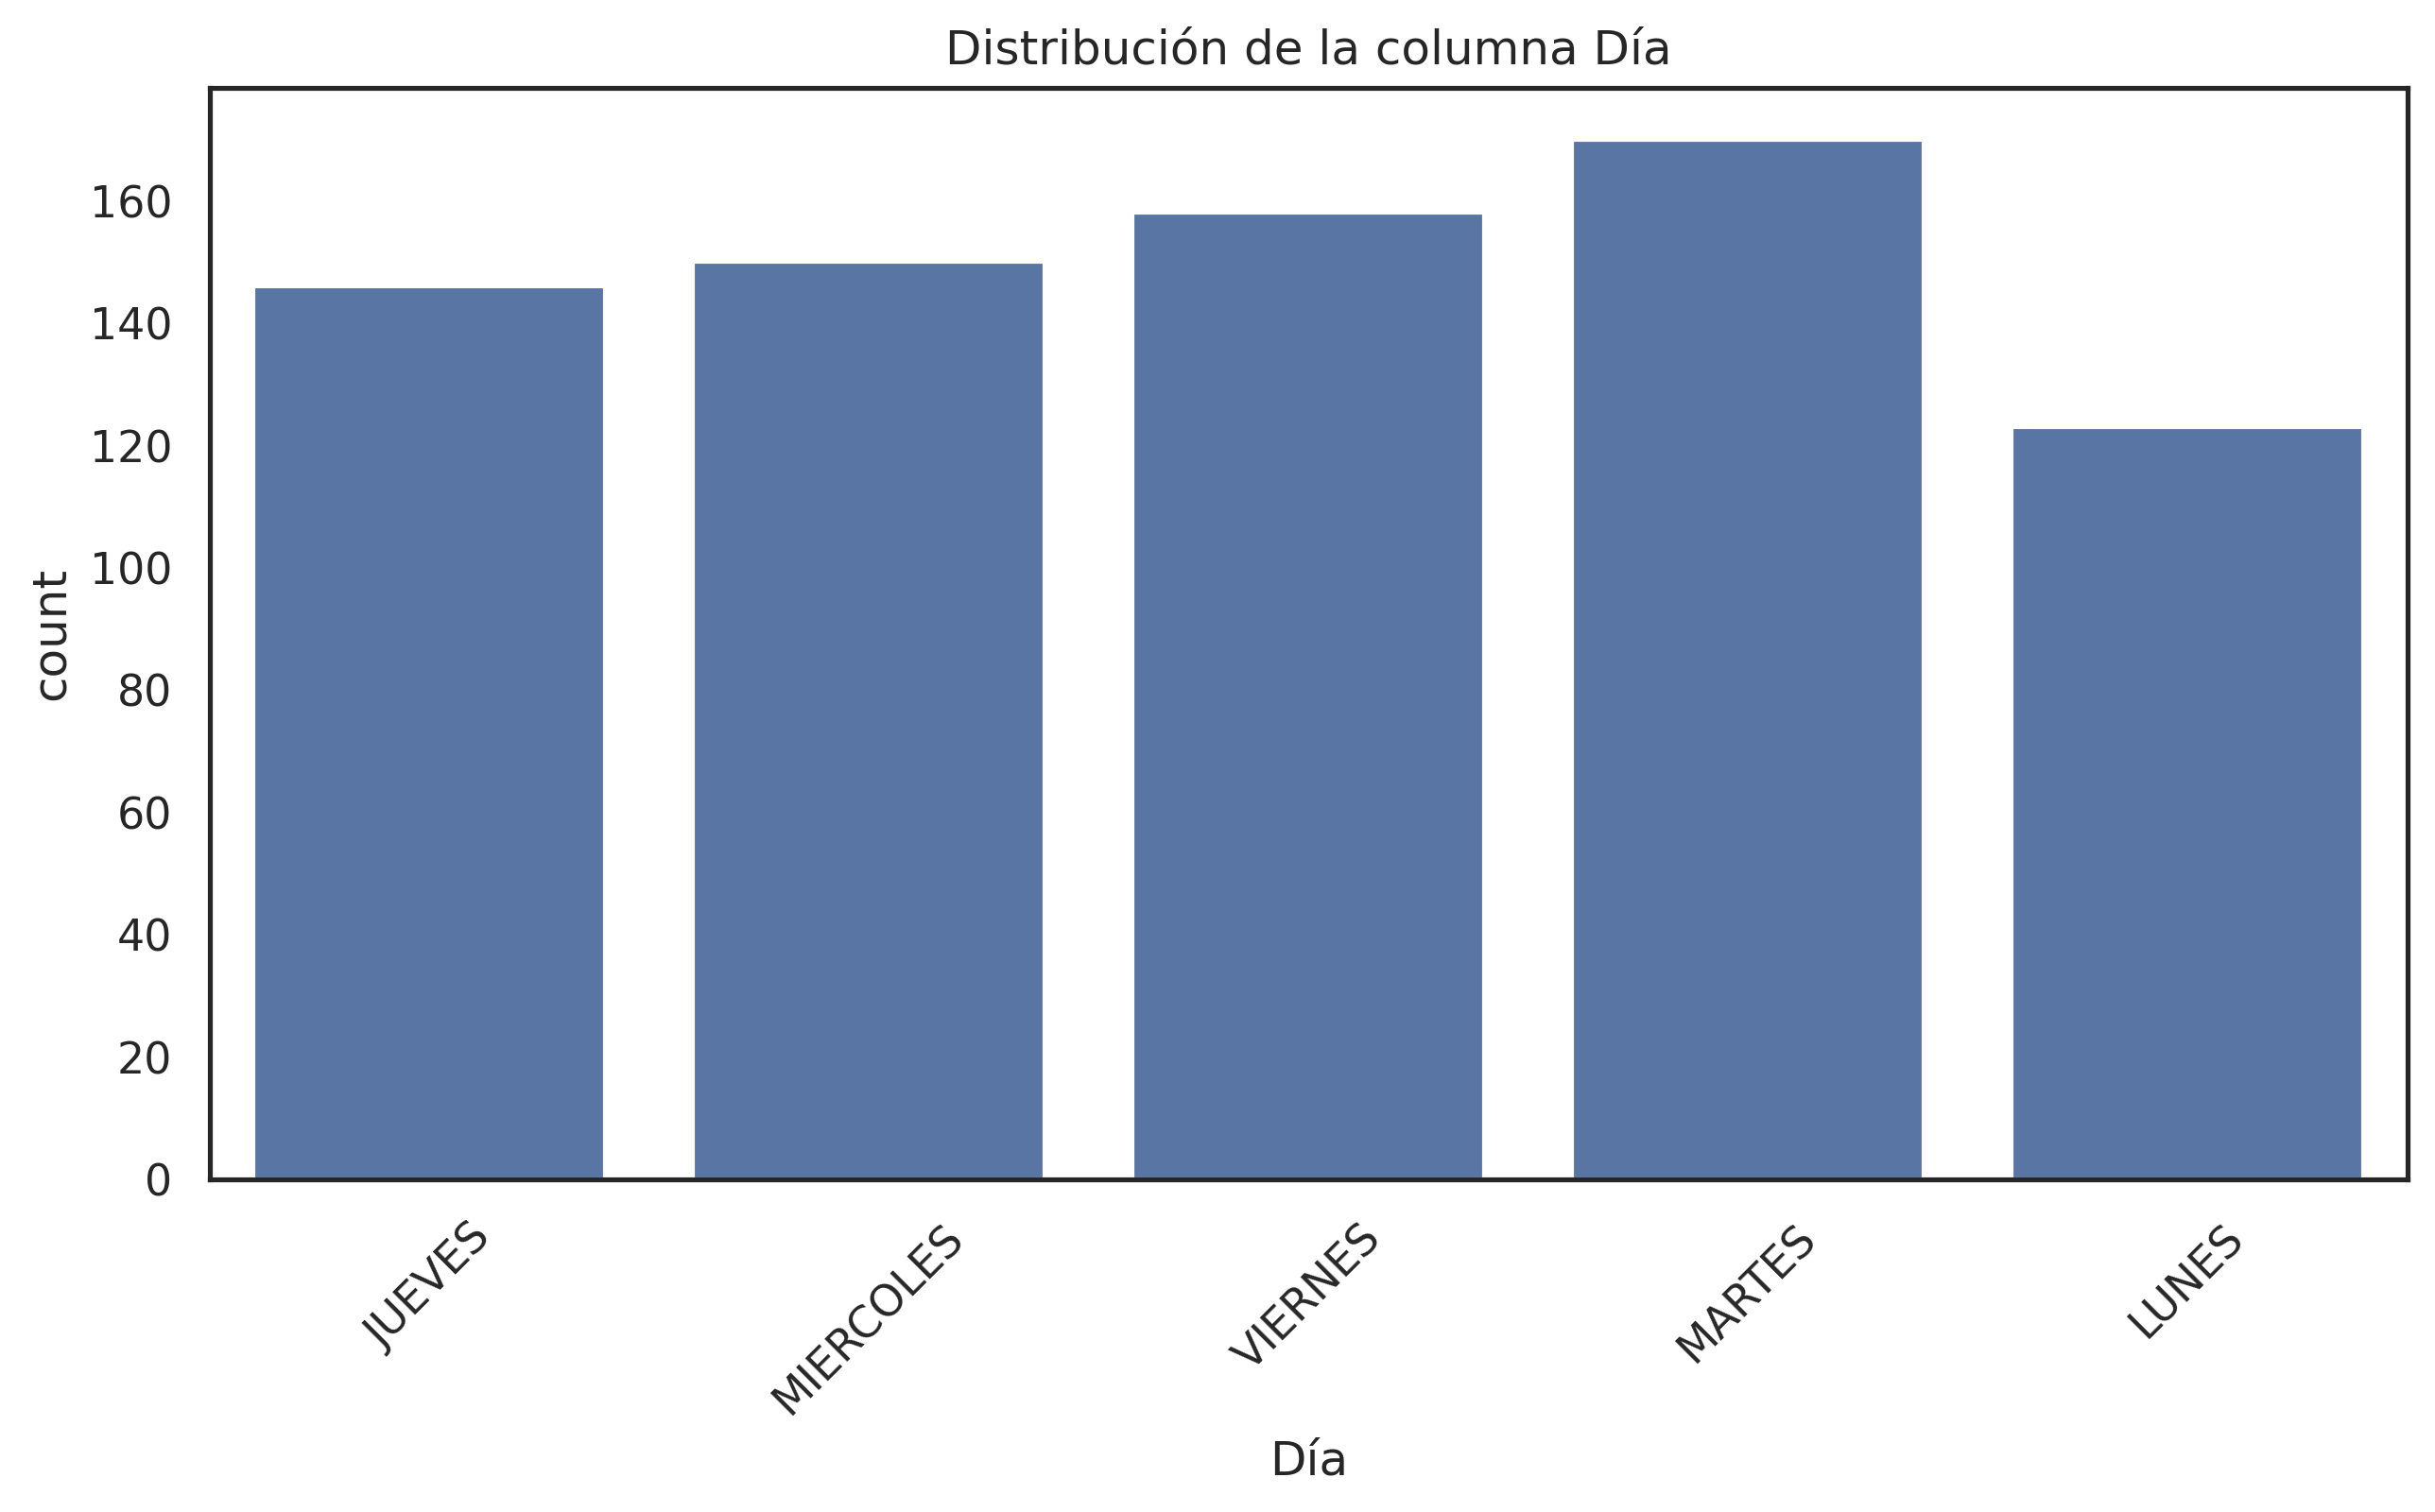

In [168]:
columna = 'Día'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_1, x=columna)
plt.title(f"Distribución de la columna {columna}")
plt.xticks(rotation=45)
plt.show()

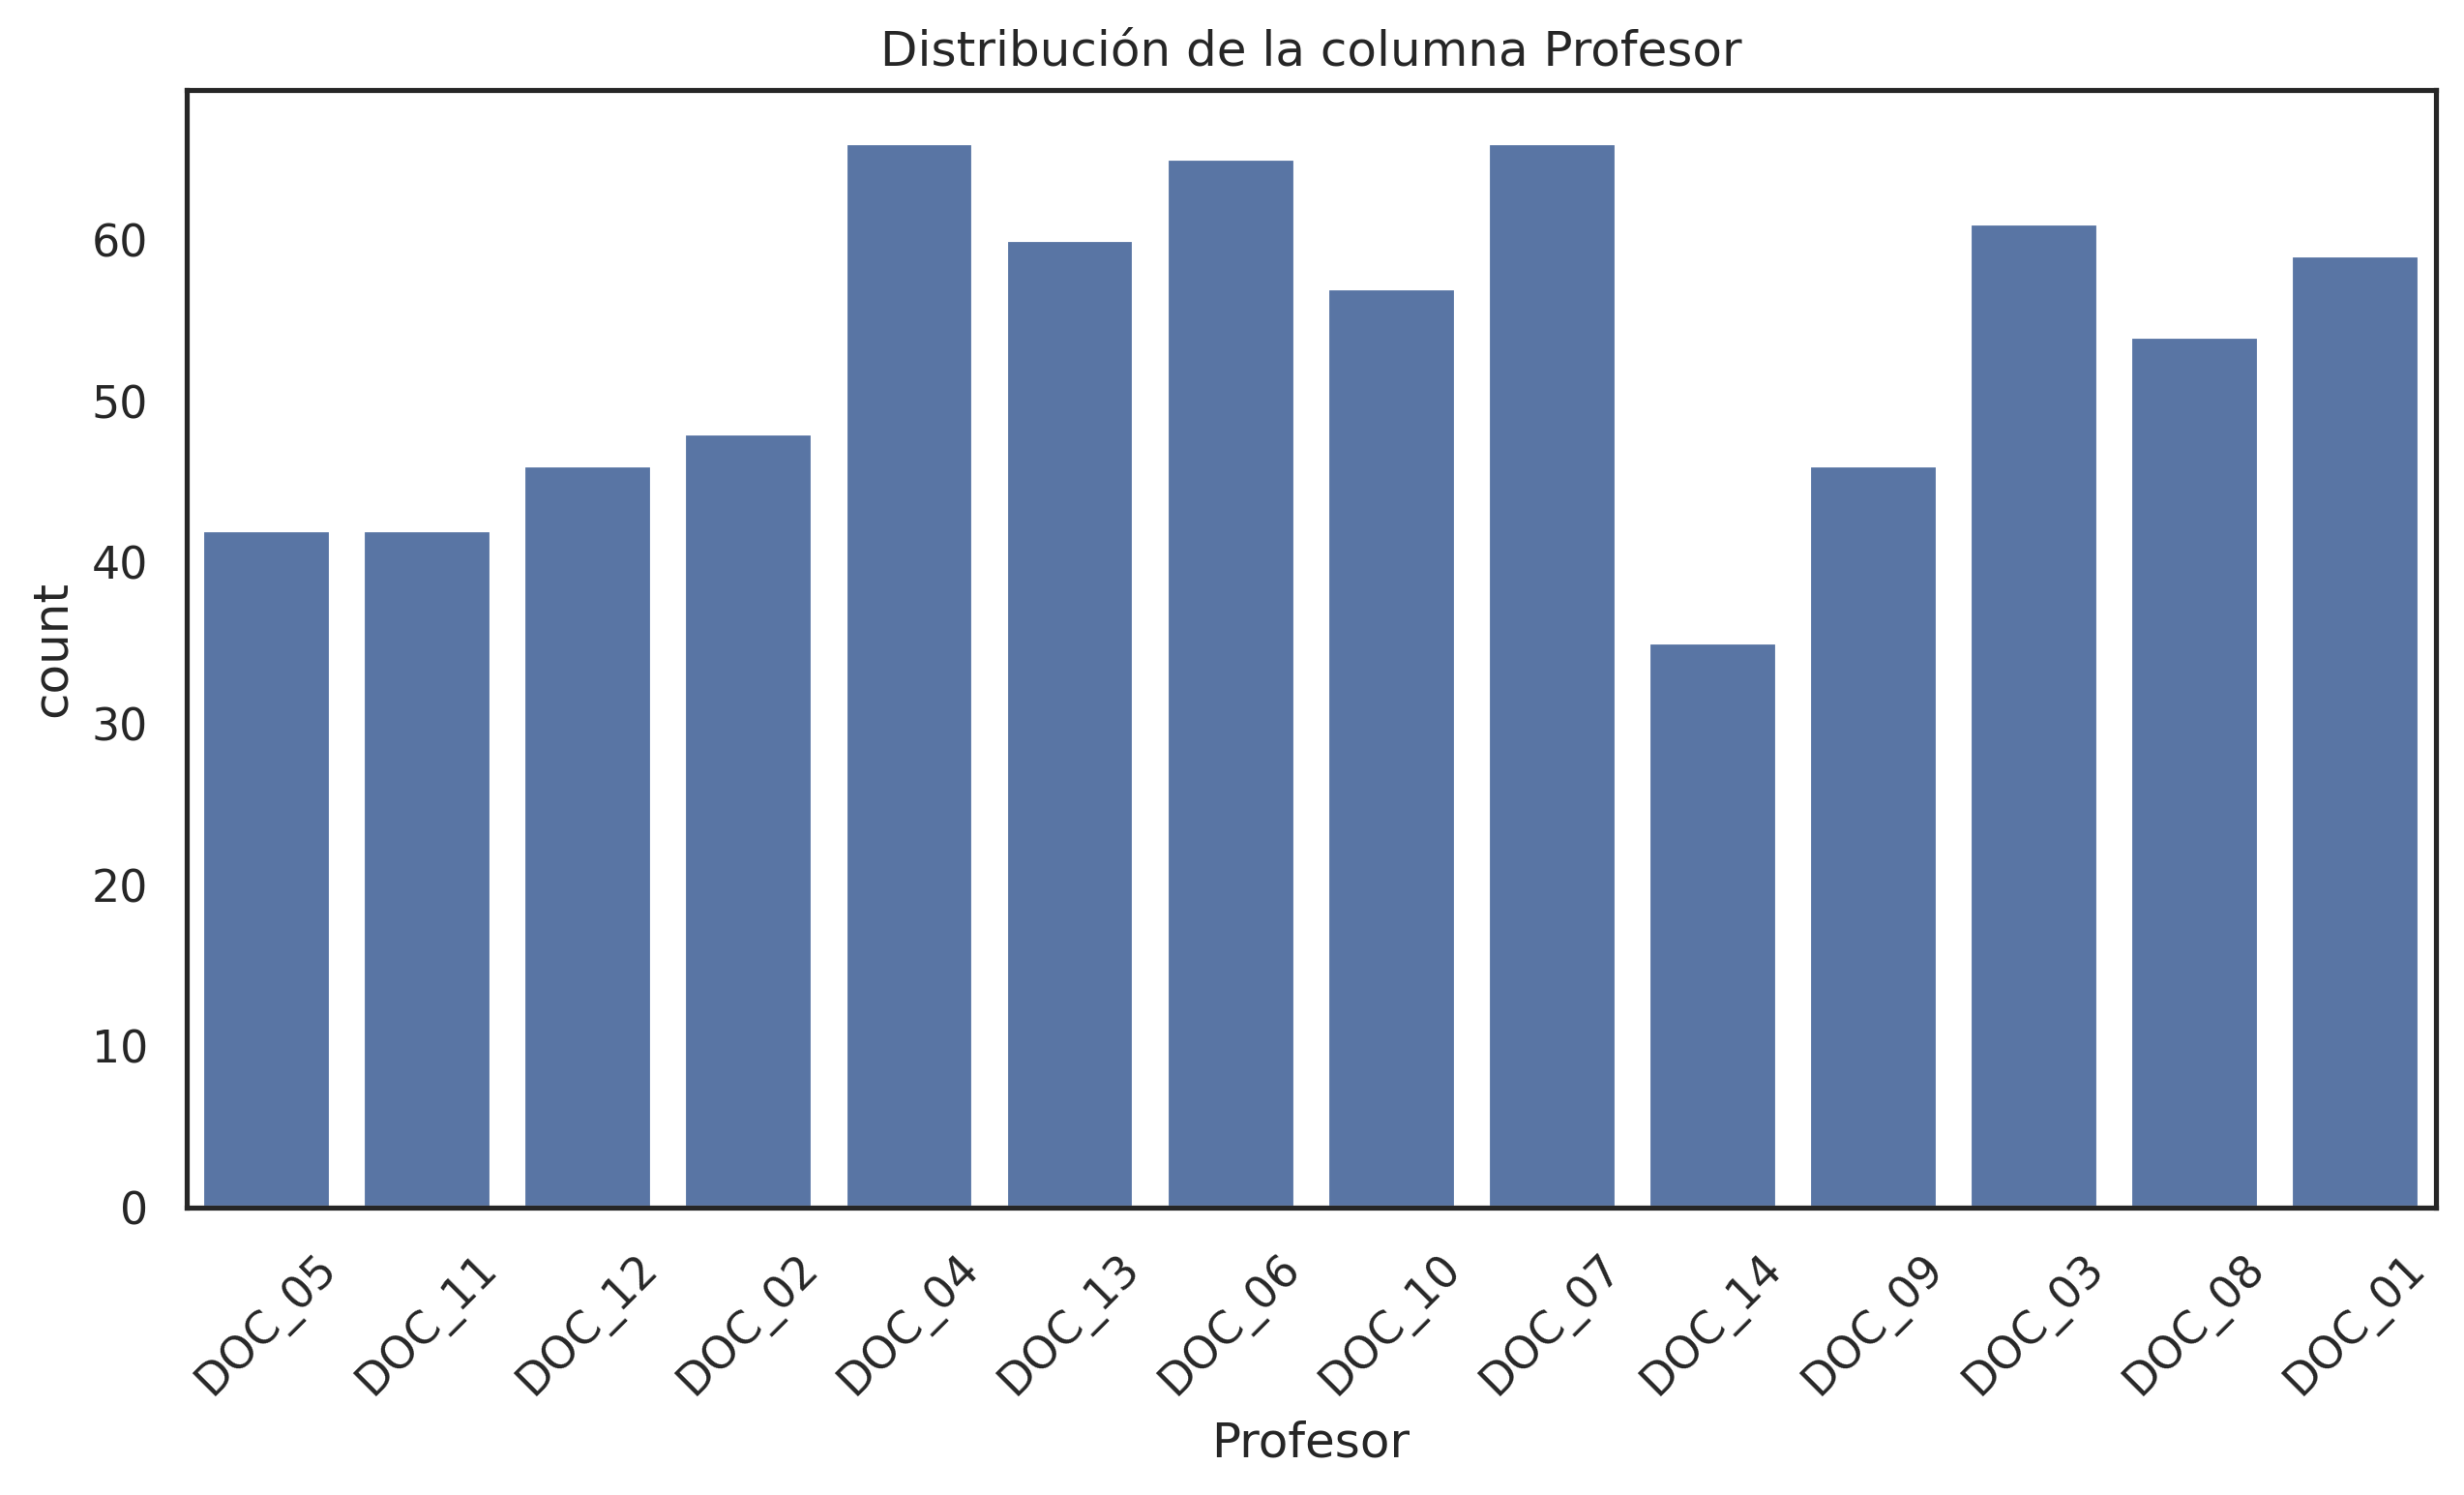

In [169]:
columna = 'Profesor'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_1, x=columna)
plt.title(f"Distribución de la columna {columna}")
plt.xticks(rotation=45)
plt.show()

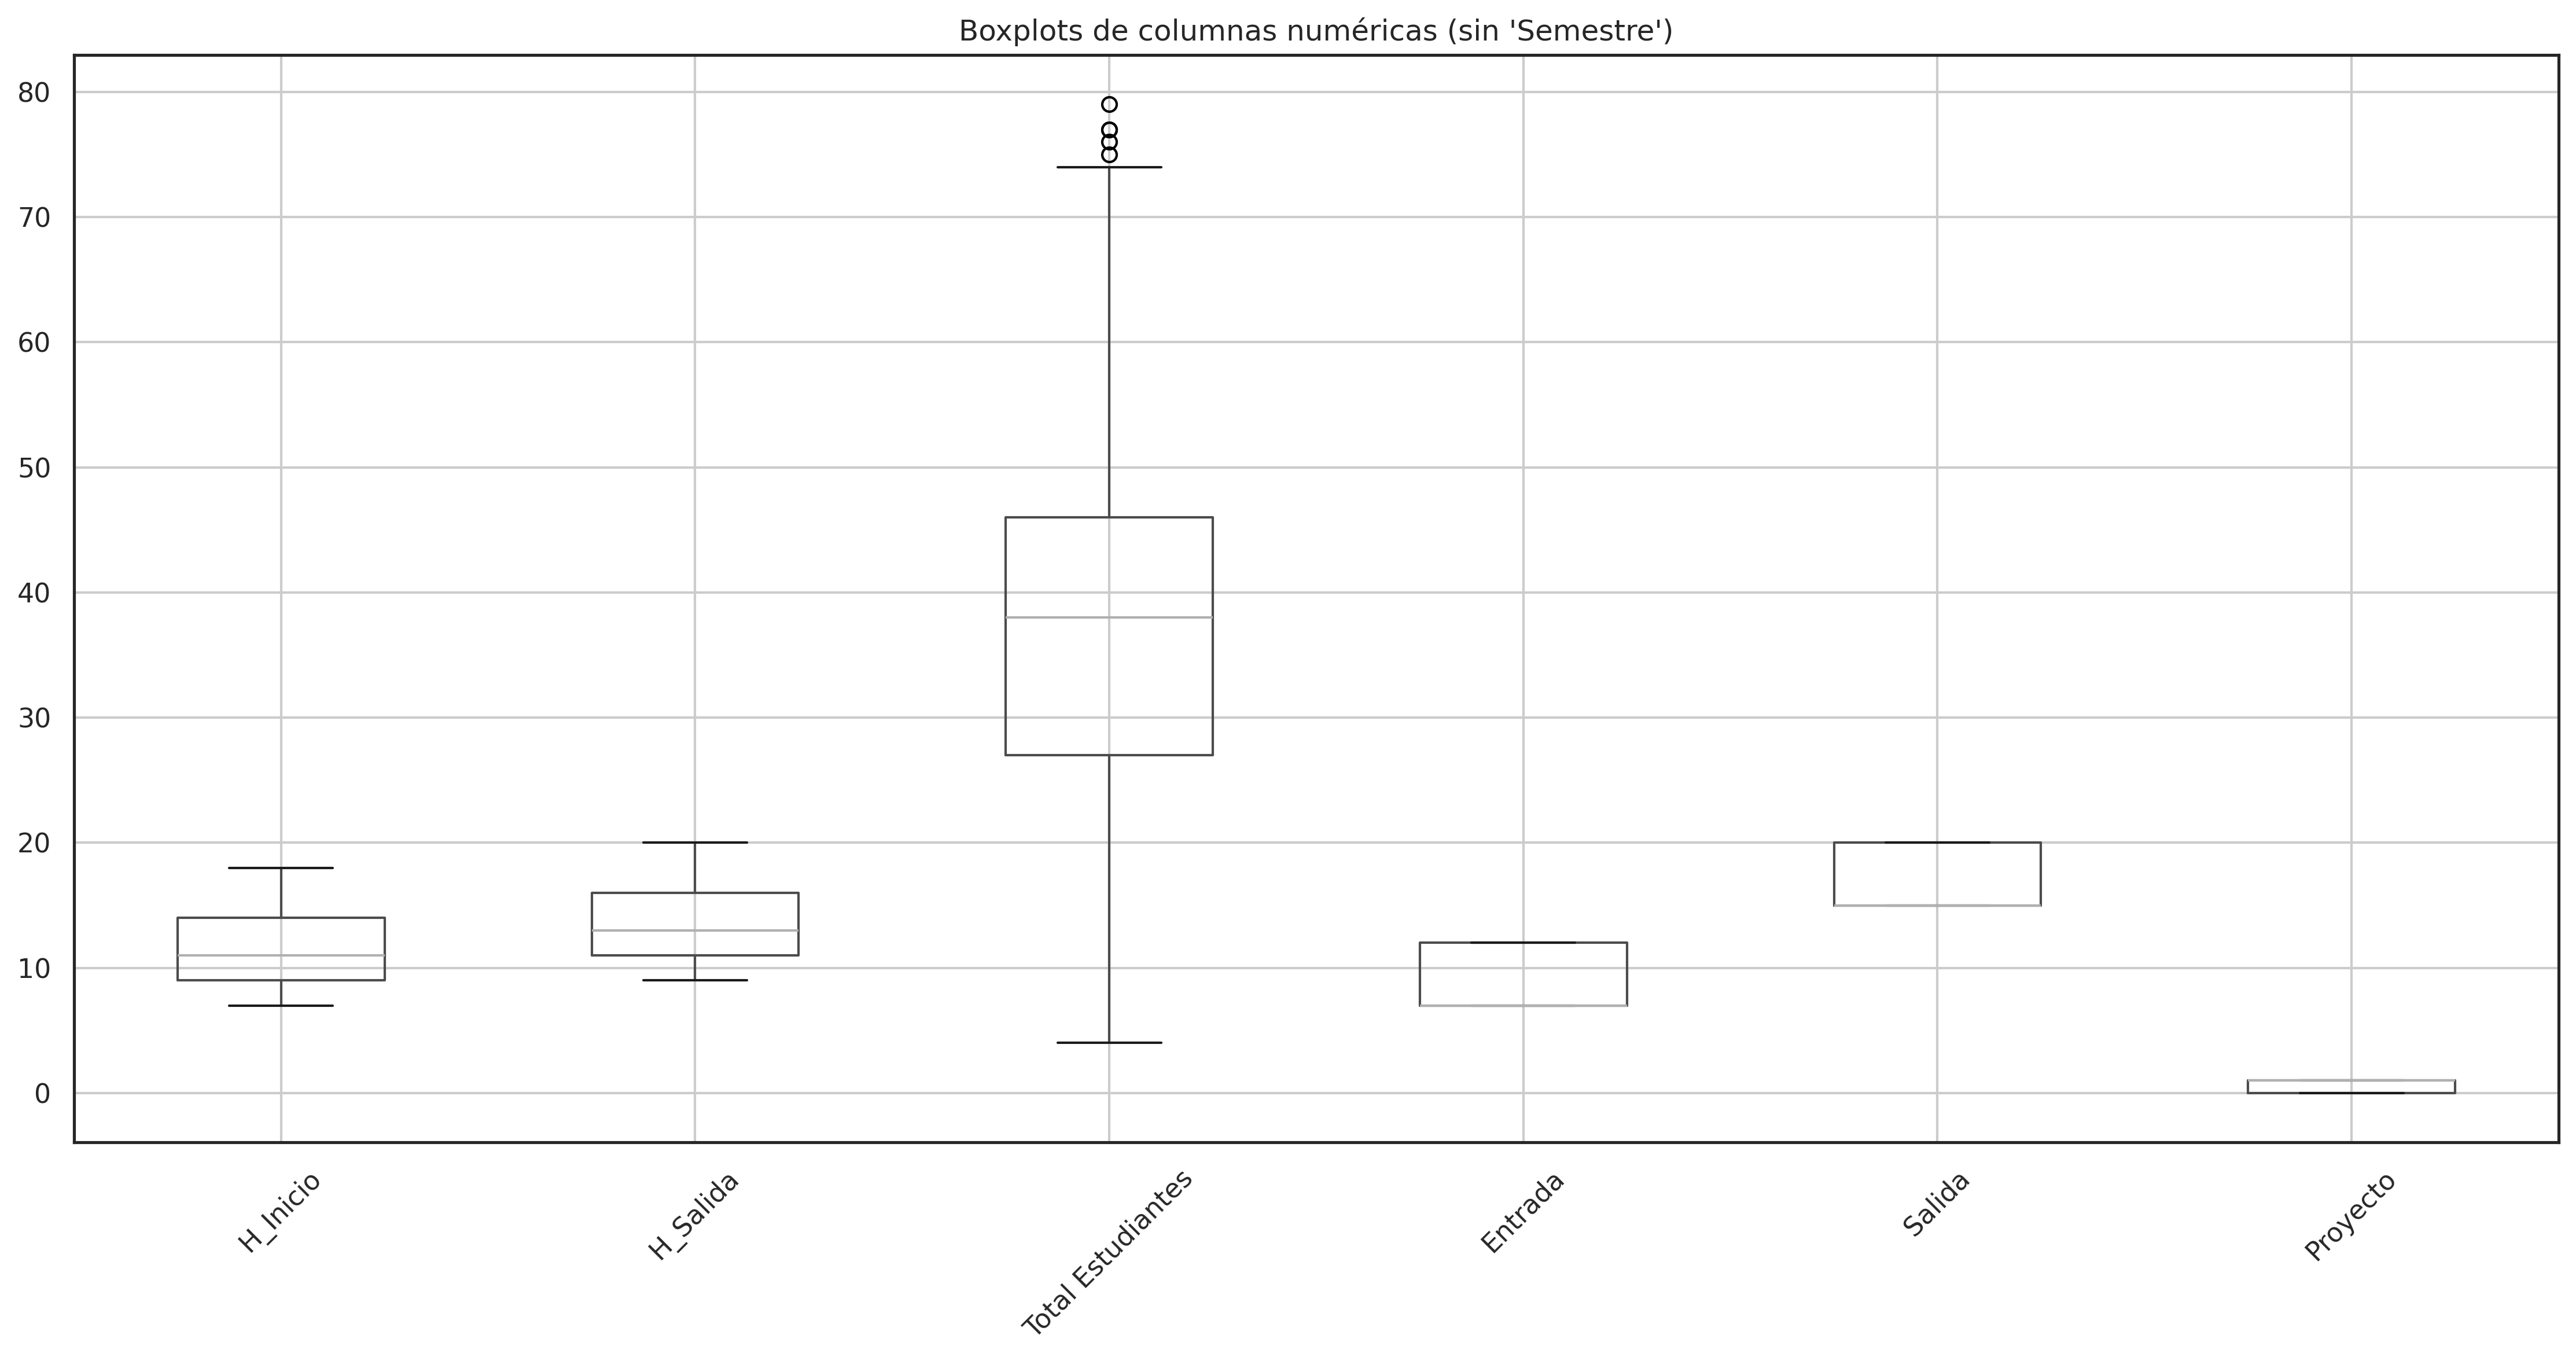

In [173]:
plt.figure(figsize=(15, 8))

# Eliminar la columna 'Semestre' si está presente
cols_sin_semestre = [col for col in num_df.columns if col != 'Semestre']

num_df[cols_sin_semestre].boxplot(rot=45)
plt.title("Boxplots de columnas numéricas (sin 'Semestre')")
plt.tight_layout()
plt.show()

/tmp/ipython-input-193-1781125617.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, patch_artist=True, labels=labels)


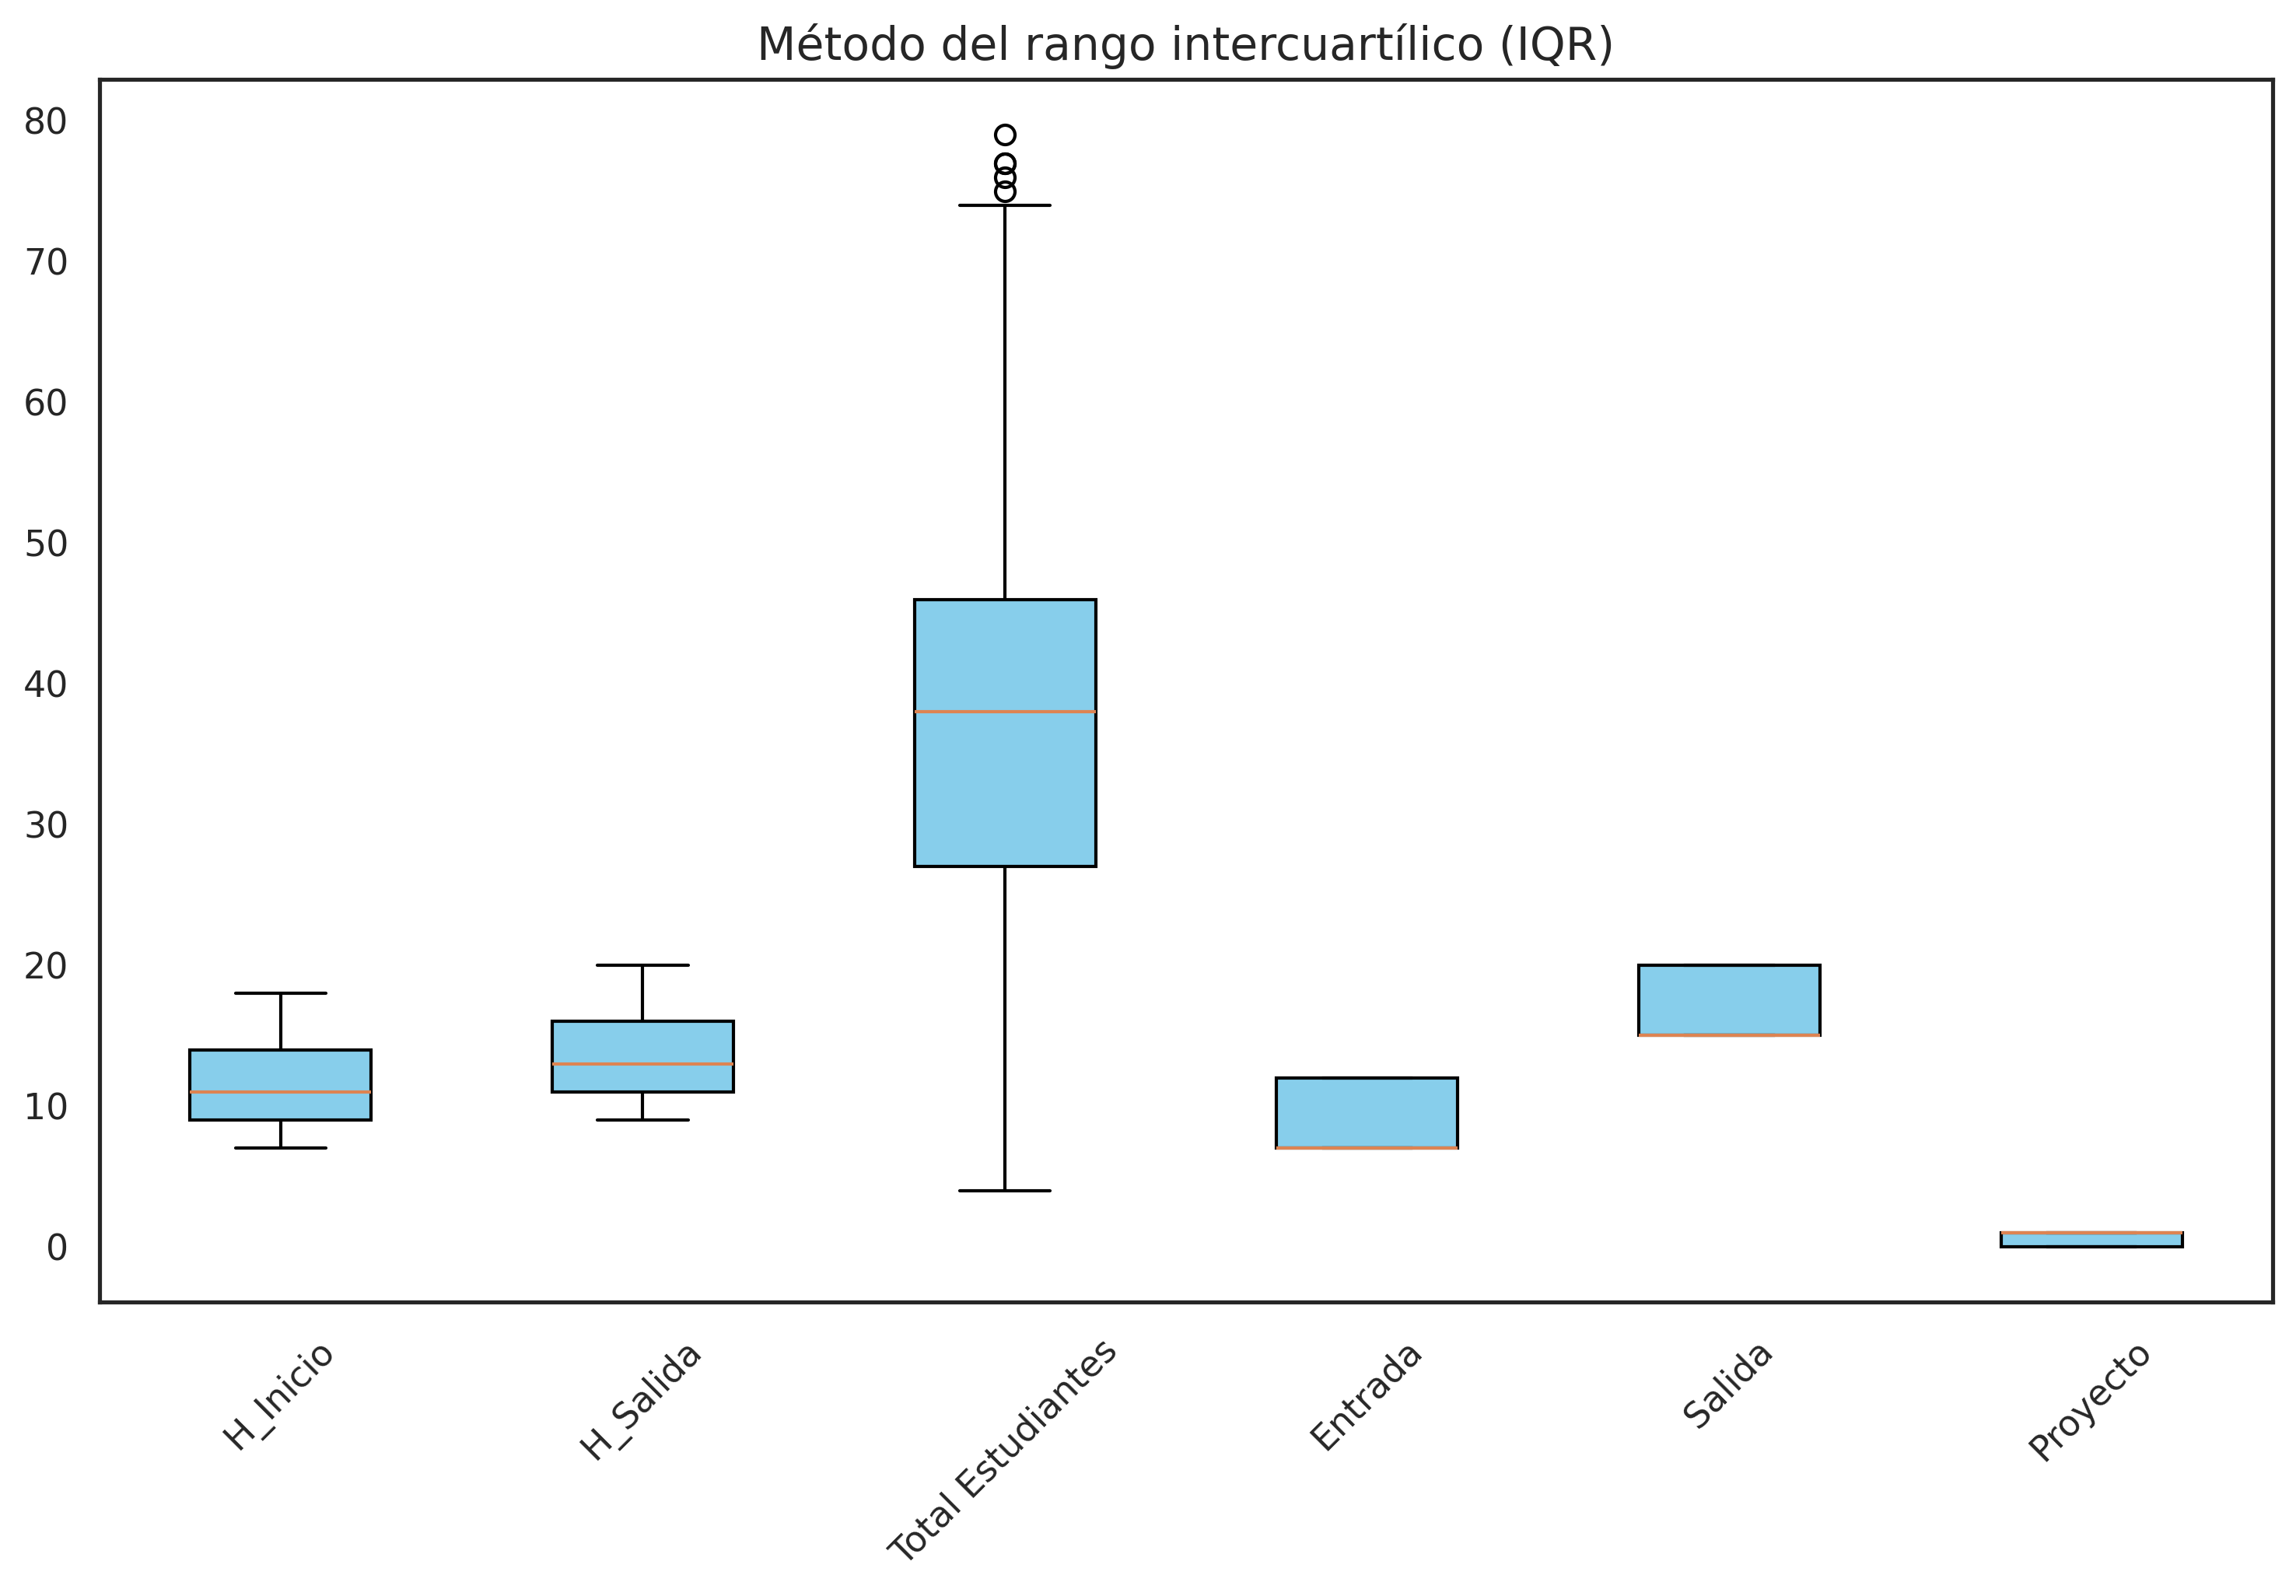

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Eliminar la columna 'Semestre'
cols_sin_semestre = [col for col in num_df.columns if col != 'Semestre']
data = num_df[cols_sin_semestre].values
labels = cols_sin_semestre

# Crear boxplot desde matplotlib directamente
box = plt.boxplot(data, patch_artist=True, labels=labels)

# Aplicar color a cada caja
for patch in box['boxes']:
    patch.set_facecolor('skyblue')

plt.xticks(rotation=45)
plt.title("Método del rango intercuartílico (IQR)", fontsize=14)
plt.tight_layout()
plt.show()



In [196]:
# Función para detectar outliers con IQR
def detectar_outliers_iqr(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_col[(df_col < Q1 - 1.5 * IQR) | (df_col > Q3 + 1.5 * IQR)]
    return outliers

# Detectar outliers por cada columna
outliers_dict = {}
for col in num_df.columns:
    outliers = detectar_outliers_iqr(num_df[col])
    print(f"{col}: {len(outliers)} outliers")
    outliers_dict[col] = outliers

H_Inicio: 0 outliers
H_Salida: 0 outliers
Semestre: 0 outliers
Total Estudiantes: 5 outliers
Entrada: 0 outliers
Salida: 0 outliers
Proyecto: 0 outliers


In [197]:
# Unir todos los índices con outliers
indices_outliers = set()
for serie in outliers_dict.values():
    indices_outliers.update(serie.index)
indices_outliers = list(indices_outliers)
# Mostrar registros con outliers
df_outliers = df.loc[indices_outliers]
df_outliers

Facultad        Carrera        Día  H_Inicio  H_Salida Profesor  Semestre  \
704      ICA     INDUSTRIAL    VIERNES        11        13   DOC_13      2020   
618      ICA     INDUSTRIAL    VIERNES        11        13   DOC_09      2020   
57       ICA  S INFORMACION     MARTES        18        20   DOC_14      2021   
26       ICA     INDUSTRIAL     JUEVES        11        13   DOC_06      2021   
414      ARQ   ARQUITECTURA  MIERCOLES        11        13   DOC_10      2324   

     Total Estudiantes  Entrada  Salida  Proyecto  
704                 75        7      15         1  
618                 77        7      15         1  
57                  79       12      20         0  
26                  76        7      15         0  
414                 77        7      15         1

In [198]:
# Eliminar filas donde Total Estudiantes es igual a 0
df_1 = df_1[df_1['Total Estudiantes'] != 0]

In [199]:
# Asegurarse que el campo es string para separarlo
df_1['Semestre'] = df_1['Semestre'].astype(str).str.strip()

df_1 = df_1[~df_1['Semestre'].str.startswith(('1919', '1920'))]

print(sorted(df_1['Semestre'].unique()))

['2020', '2021', '2121', '2122', '2222', '2223', '2323', '2324', '2424', '2425']


In [200]:


# Extraer año inicial y final, manejar casos con decimales
df_1['Año_Inicio'] = df_1['Semestre'].str[:2].str.replace('.0', '').astype(int) + 2000
df_1['Año_Fin'] = df_1['Semestre'].str[2:].str.replace('.0', '').astype(int) + 2000

# Opcional: crear campo "Periodo Académico"
df_1['Periodo_Academico'] = df_1['Año_Inicio'].astype(str) + "-" + df_1['Año_Fin'].astype(str)



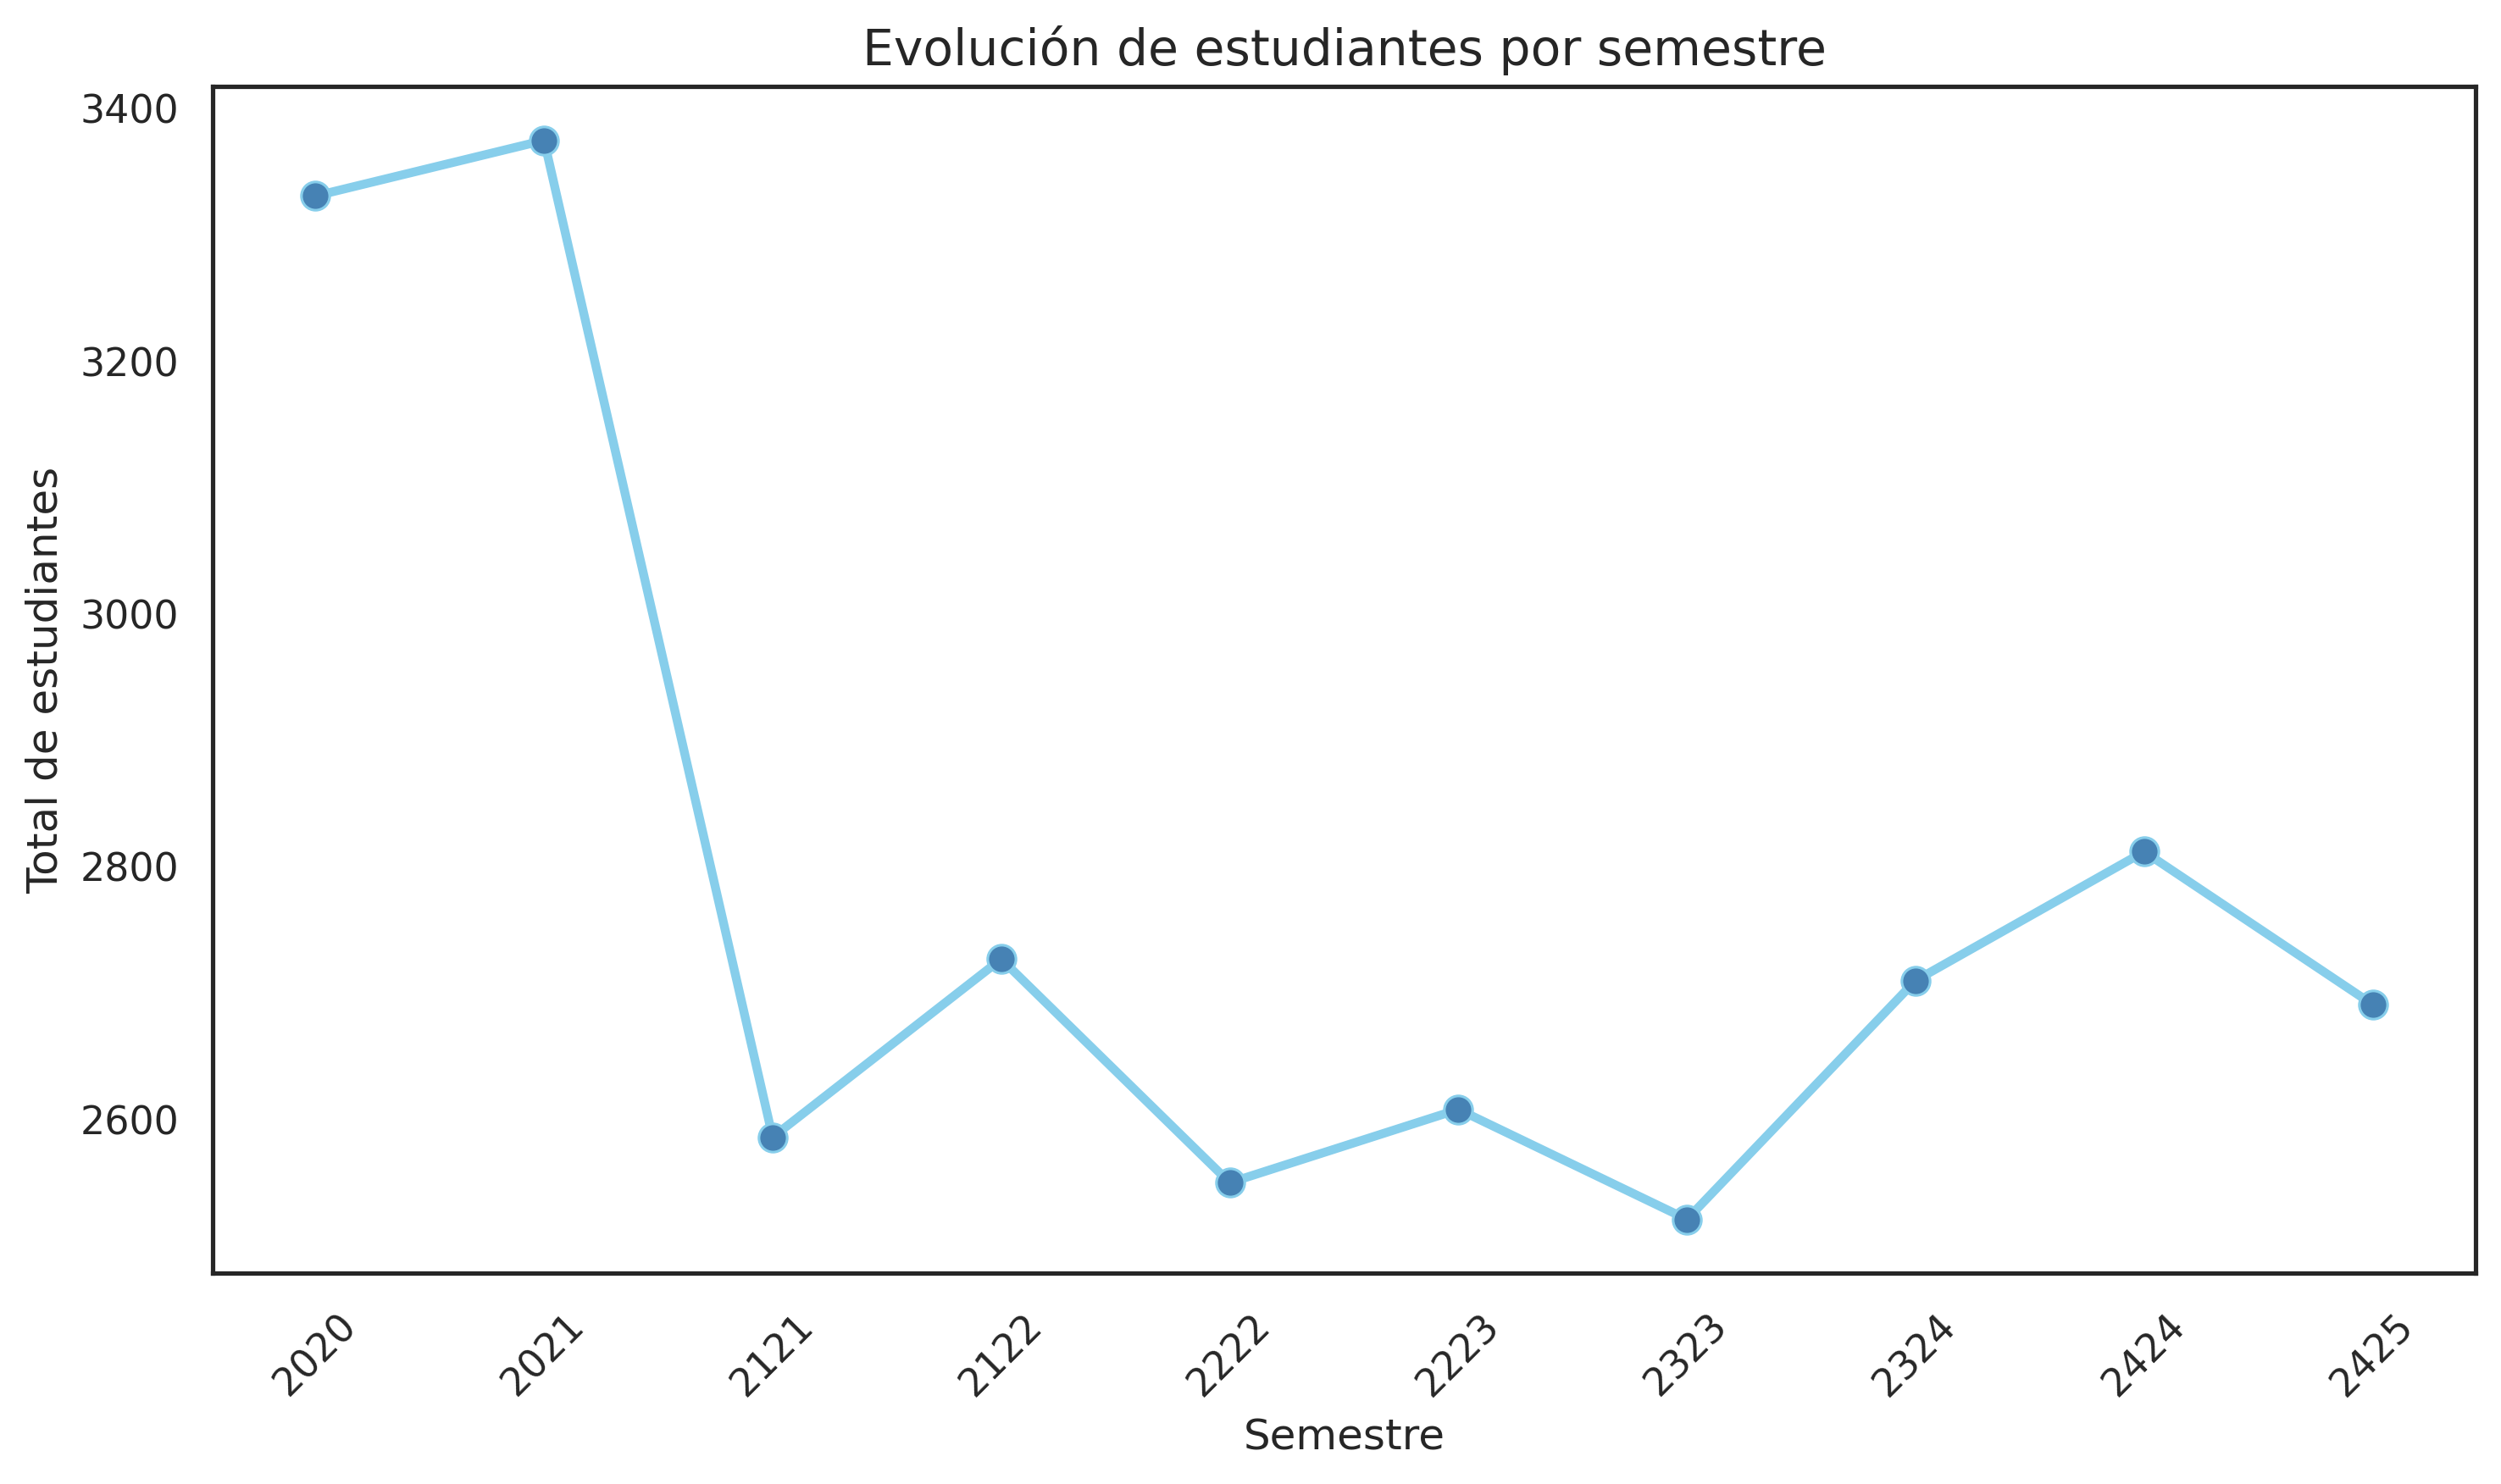

In [205]:
# Agrupar por semestre
df_evolucion = df_1.groupby('Semestre')['Total Estudiantes'].sum().reset_index()

# Asegurar que Semestre sea tipo string para que se visualice como categoría
df_evolucion['Semestre'] = df_evolucion['Semestre'].astype(str)

# Estilo coherente
sns.set(style="white")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=df_evolucion,
    x='Semestre',
    y='Total Estudiantes',
    marker='o',
    linewidth=2.5,
    color='skyblue',
    markerfacecolor='steelblue',
    markeredgecolor='skyblue',
    markersize=8
)

# Formato del gráfico
plt.title('Evolución de estudiantes por semestre', fontsize=14)
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Total de estudiantes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
# sns.despine()
plt.show()

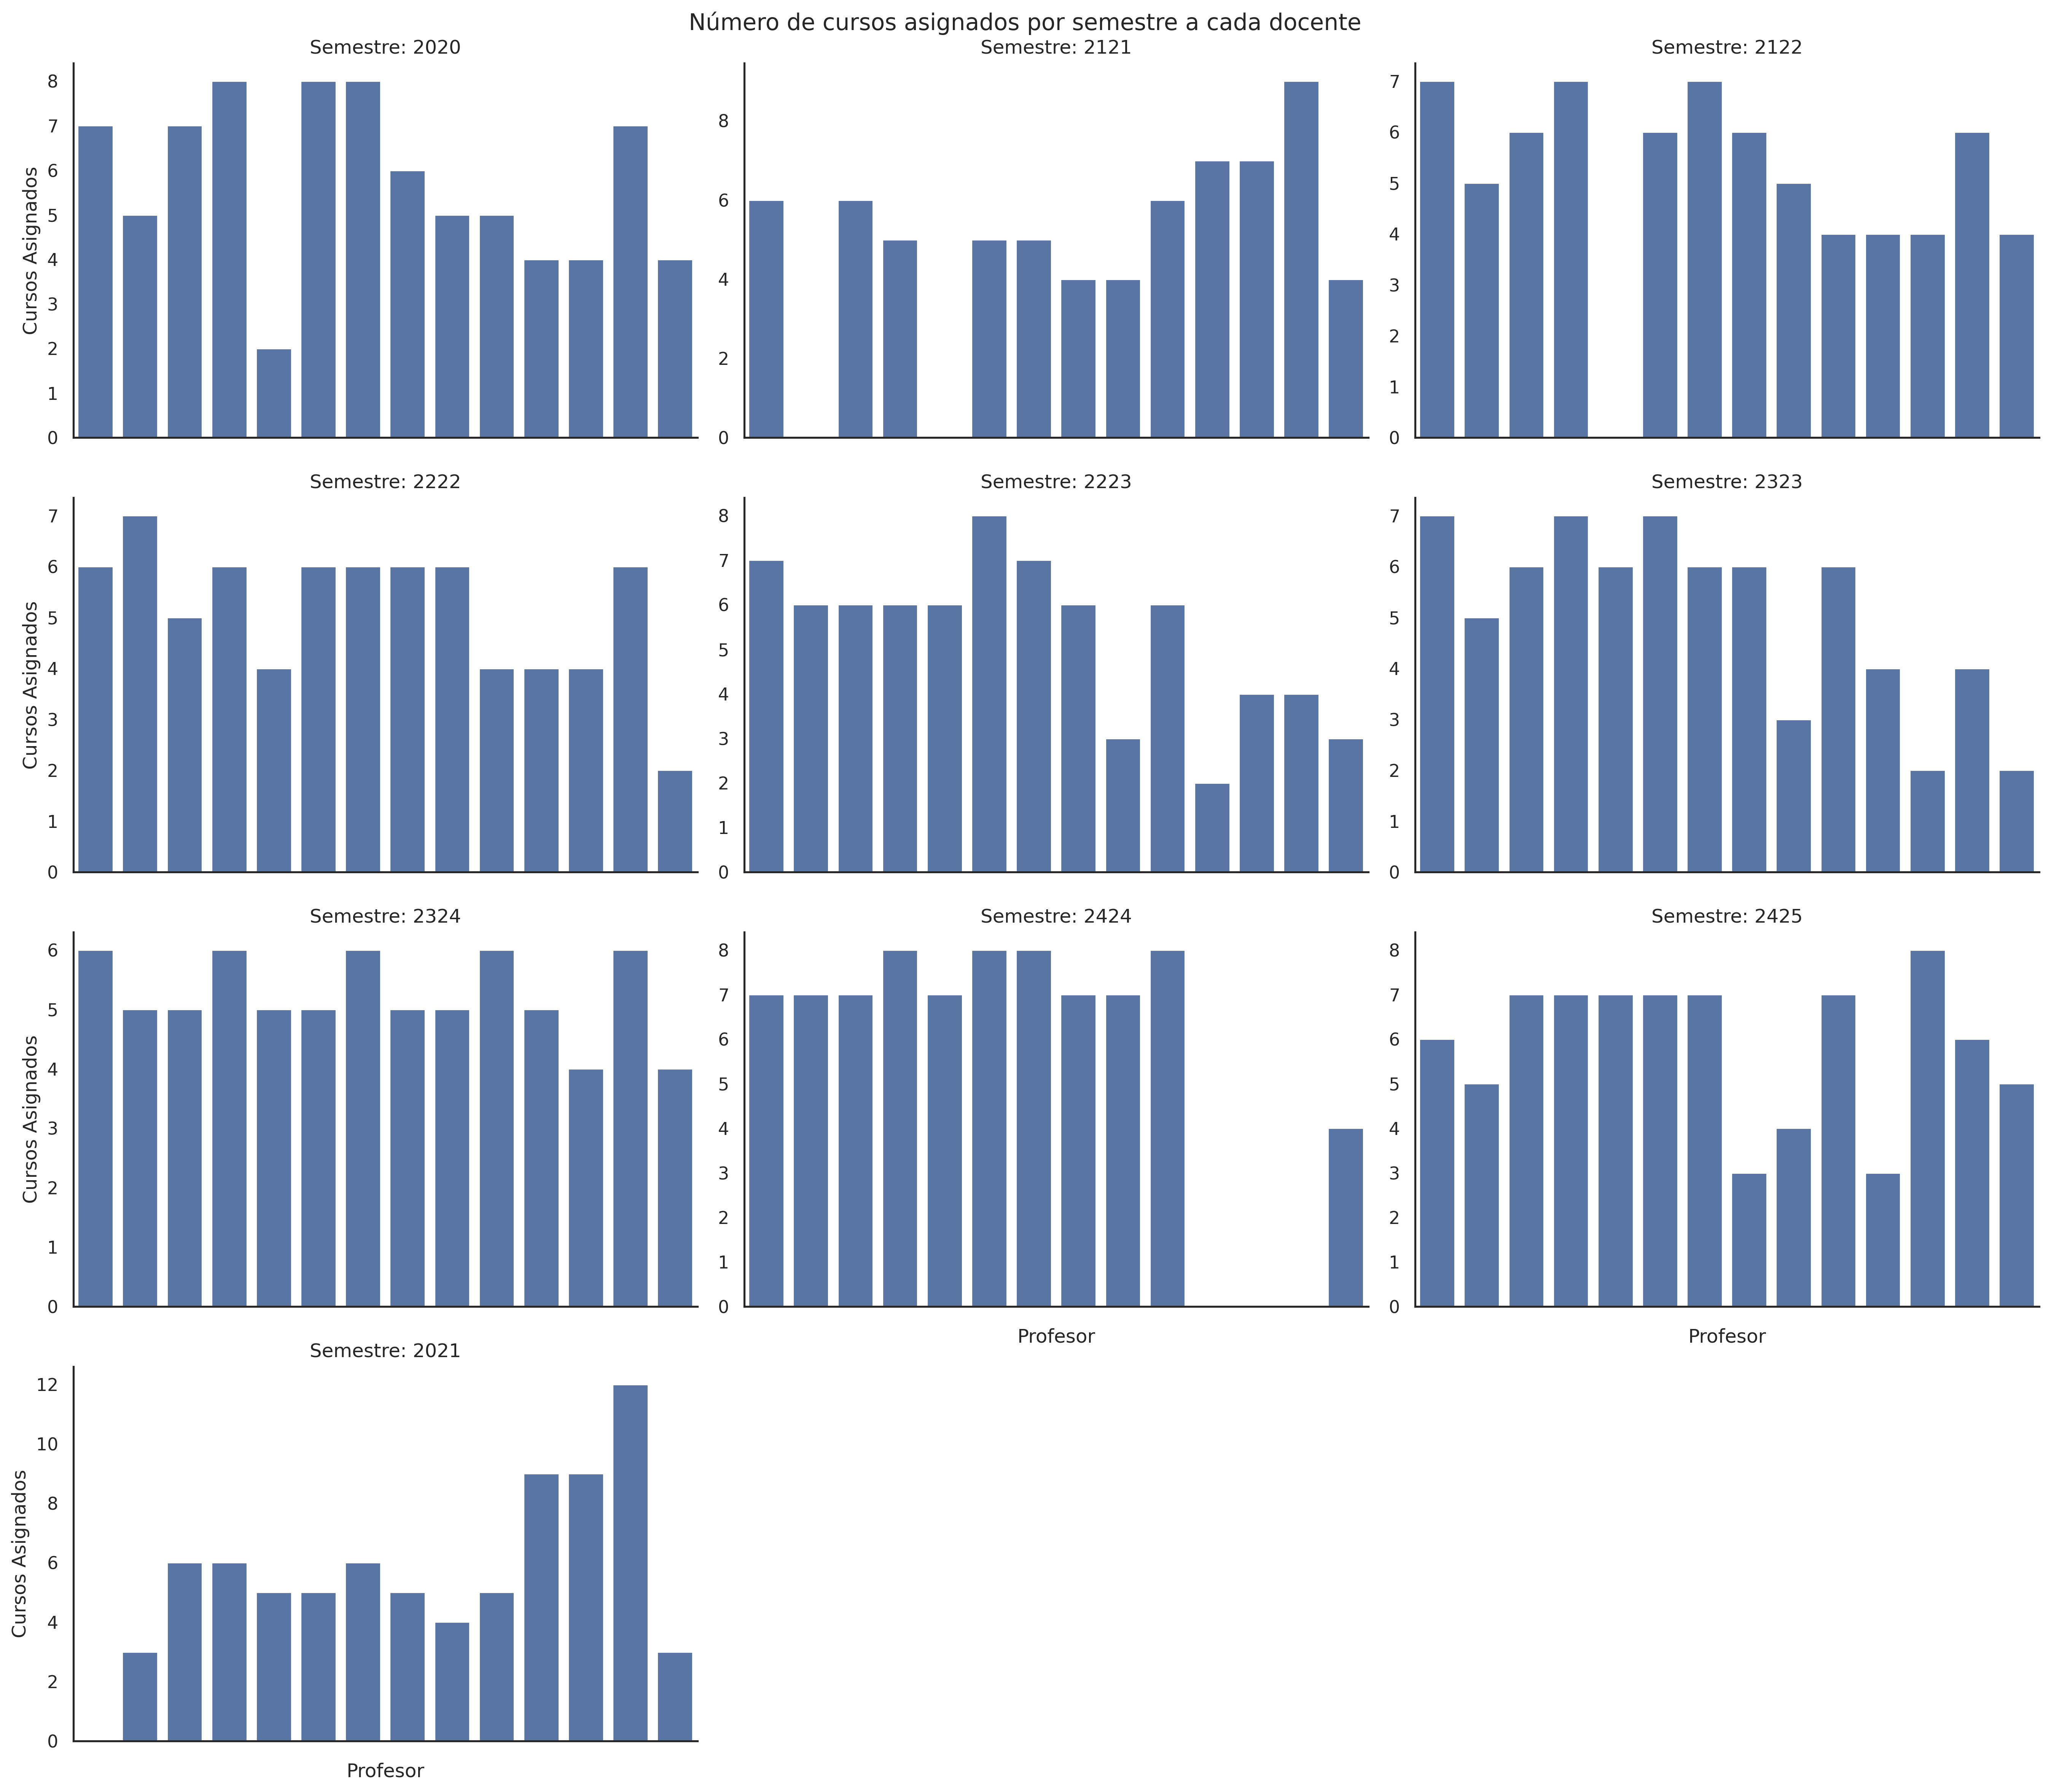

In [210]:
#Grafico comparativo para ver la carga por semestre de ursos

# Asegurar que 'Semestre' esté limpio y ordenado
df_1['Semestre'] = df_1['Semestre'].astype(str).str.strip()

# Contar número de cursos asignados por docente y semestre
df_cursos = df_1.groupby(['Profesor', 'Semestre']).size().reset_index(name='Cursos_Asignados')

# Mostrar los docentes con más cursos por semestre
df_cursos.sort_values(by='Cursos_Asignados', ascending=False).head(10)

# Crear gráfico facetado por semestre
g = sns.catplot(
    data=df_cursos,
    x='Profesor', y='Cursos_Asignados', col='Semestre',
    kind='bar', col_wrap=3, height=4, aspect=1.5,
    sharey=False
)

g.set_titles("Semestre: {col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Profesor", "Cursos Asignados")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Número de cursos asignados por semestre a cada docente')
plt.tight_layout()
plt.show()

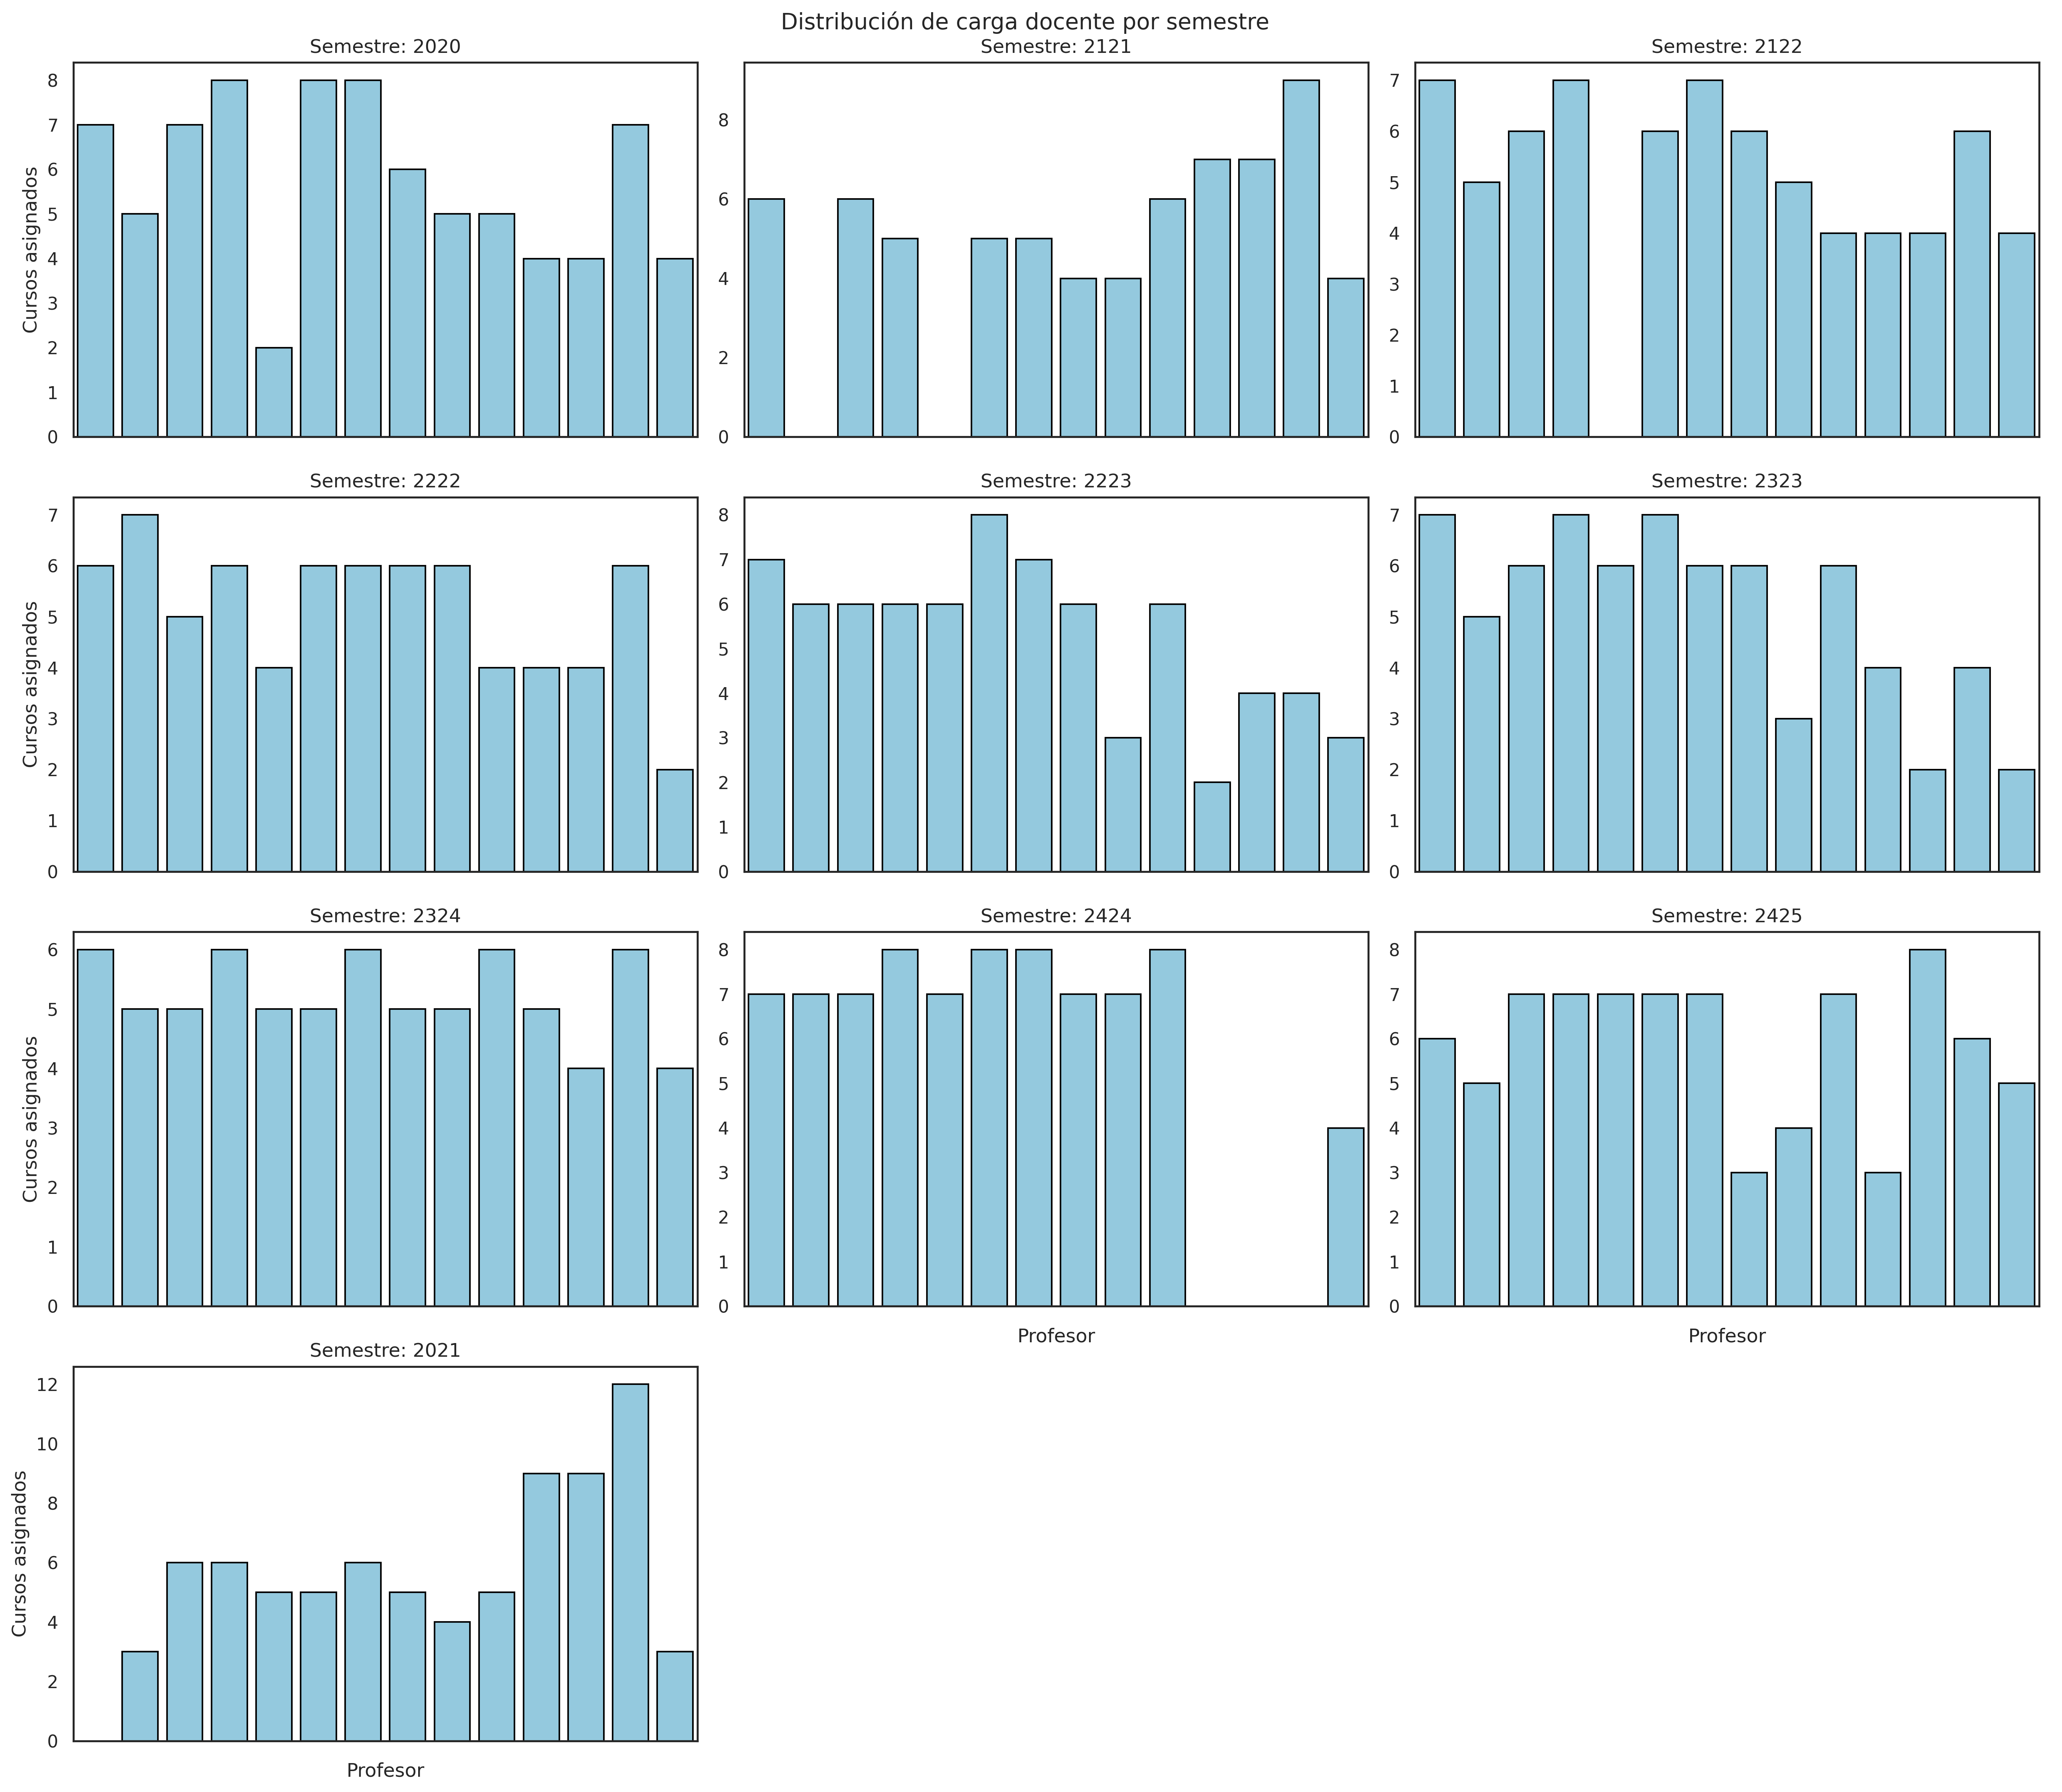

In [213]:
# Asegurar 'Semestre' como string limpio
df_1['Semestre'] = df_1['Semestre'].astype(str).str.strip()

# Contar cursos asignados
df_cursos = df_1.groupby(['Profesor', 'Semestre']).size().reset_index(name='Cursos_Asignados')

# Estilo blanco sin grid
sns.set(style="white")

# Crear gráfico facetado con TODO en skyblue y bordes visibles
g = sns.catplot(
    data=df_cursos,
    x='Profesor', y='Cursos_Asignados', col='Semestre',
    kind='bar', col_wrap=3, height=4, aspect=1.5,
    color='skyblue', edgecolor='black',  # Color único
    sharey=False
)

# Formato visual
g.set_titles("Semestre: {col_name}", size=12)
g.set_xticklabels(rotation=90, size=9)
g.set_axis_labels("Profesor", "Cursos asignados")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribución de carga docente por semestre', fontsize=14)

# Quitar retícula y mostrar bordes
for ax in g.axes.flatten():
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)

plt.tight_layout()
plt.show()

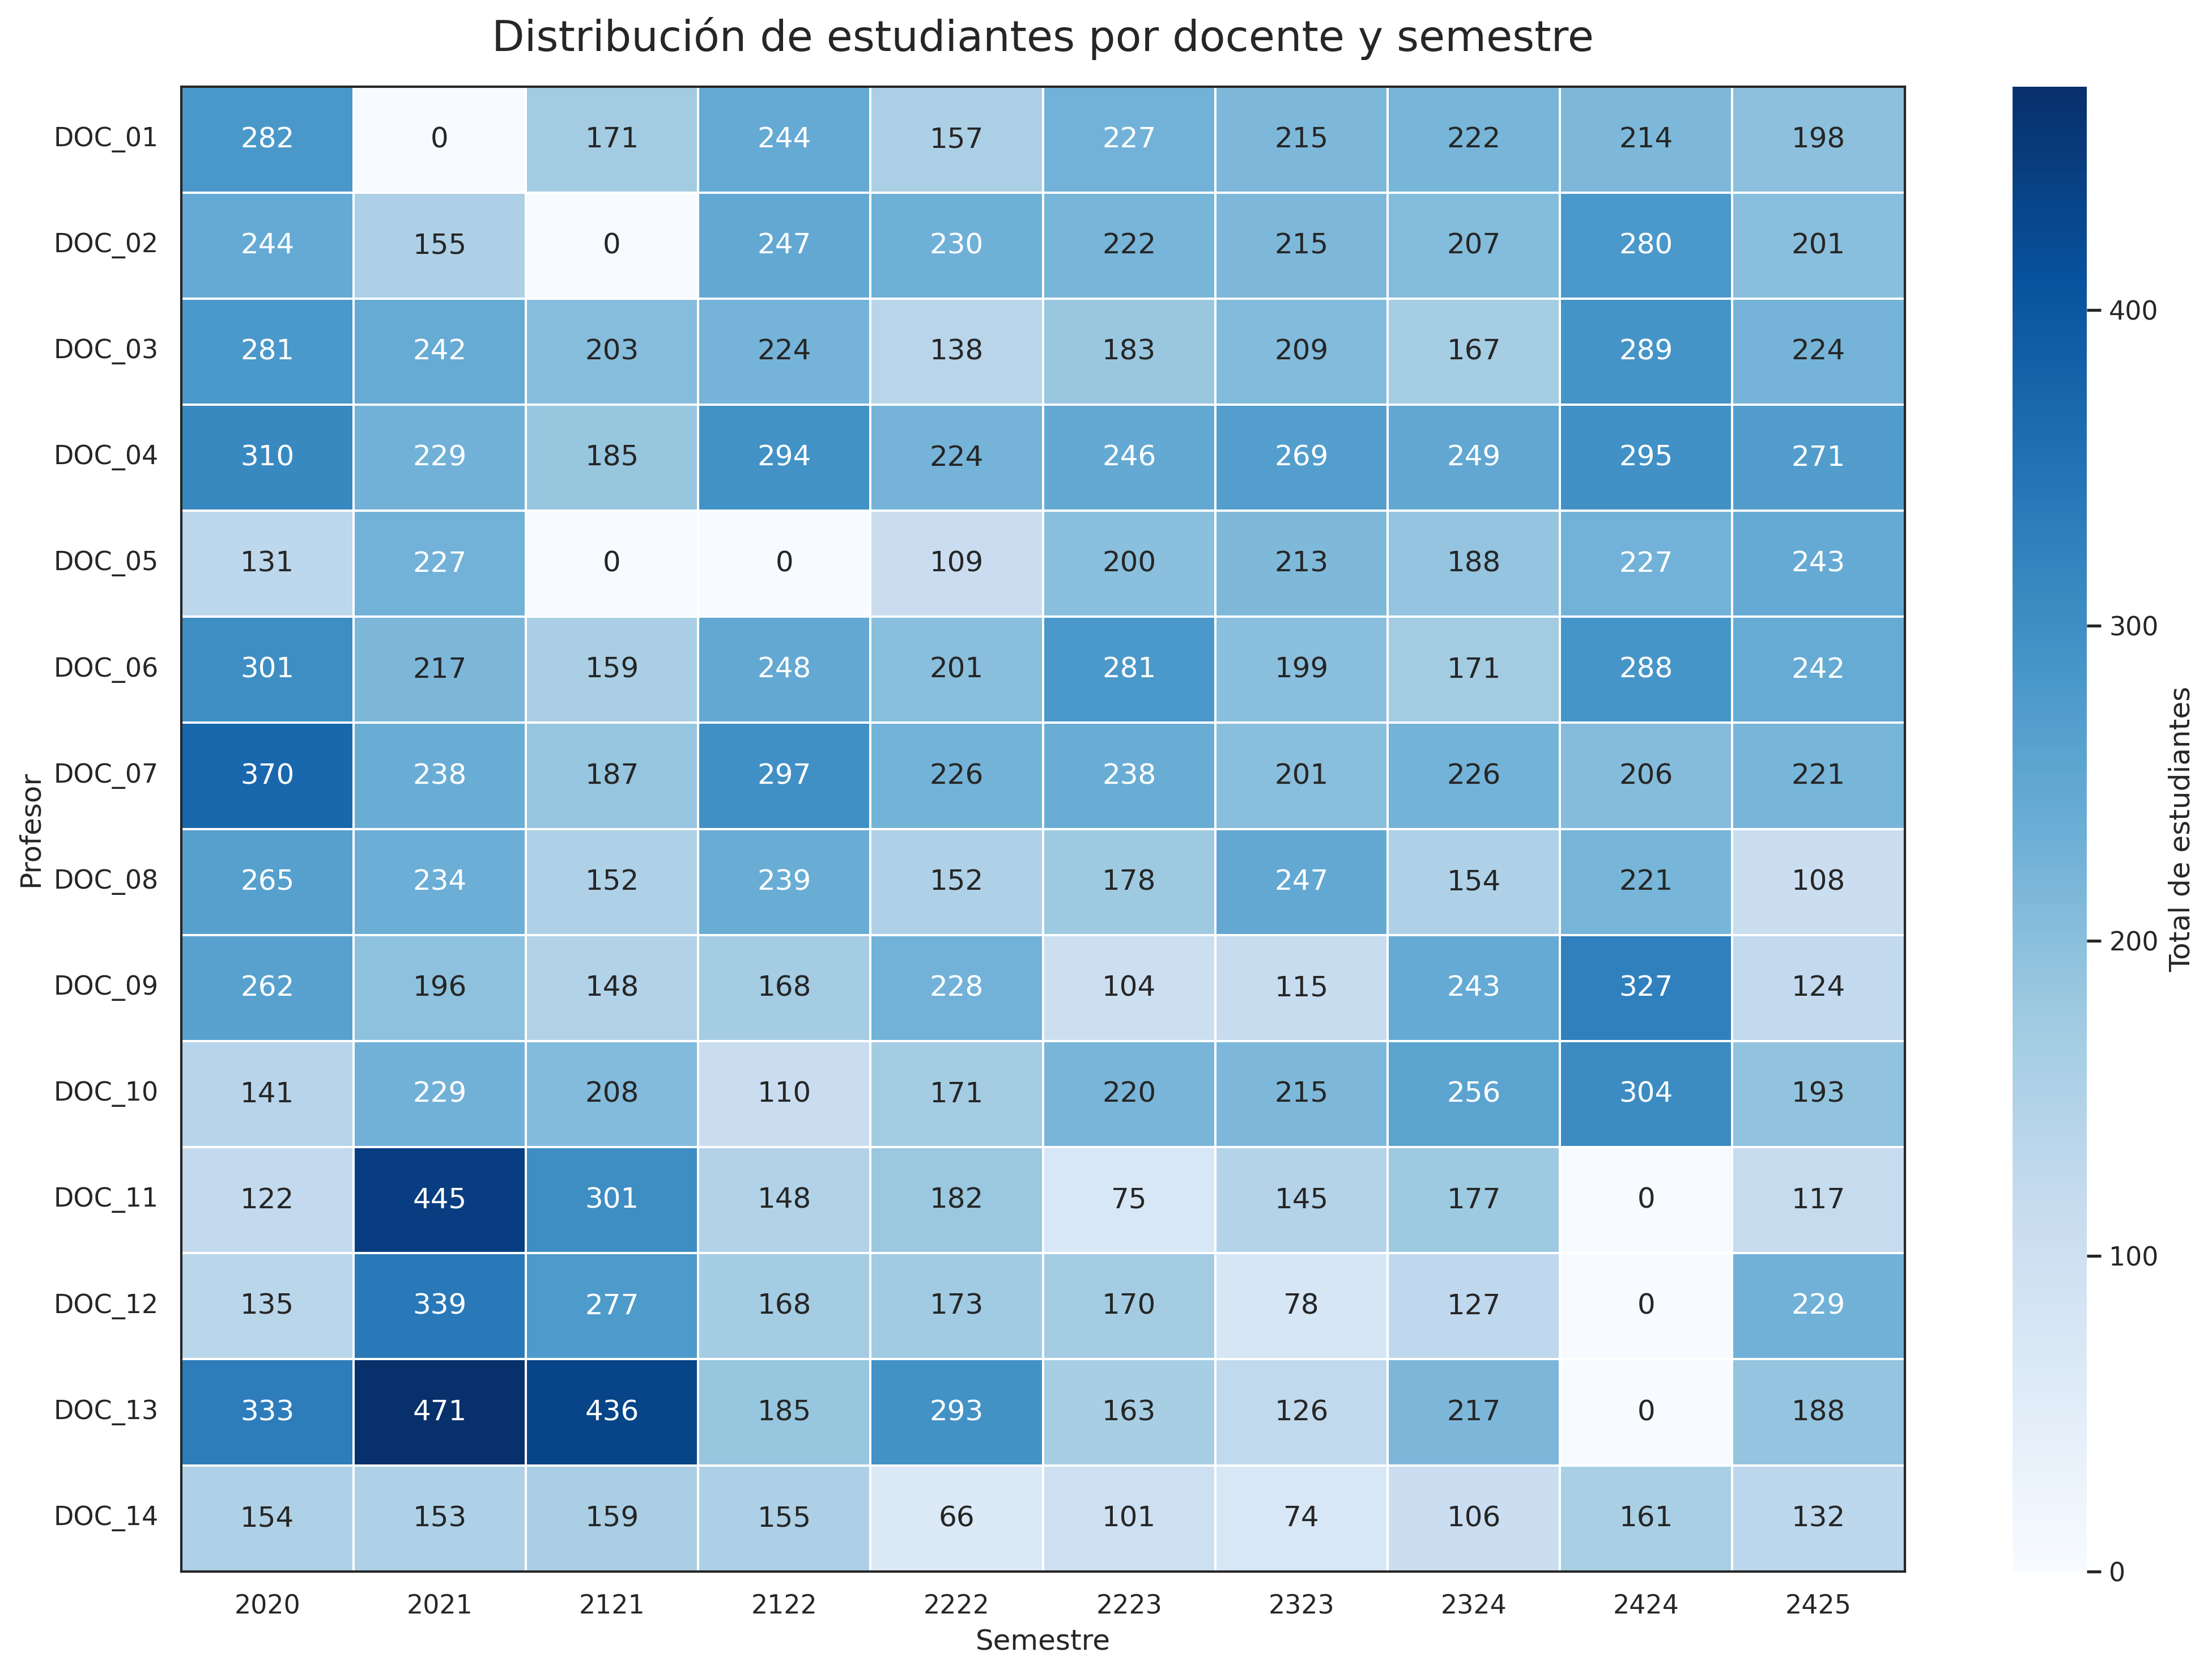

In [248]:
# Estilo general
sns.set(style="white")

# Agrupar y pivotear la tabla de estudiantes
df_estudiantes = df_1.groupby(['Profesor', 'Semestre'])['Total Estudiantes'].sum().reset_index()
df_estudiantes_pivot = df_estudiantes.pivot(index='Profesor', columns='Semestre', values='Total Estudiantes').fillna(0)

# Crear figura
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(
    df_estudiantes_pivot,
    annot=True,
    cmap="Blues",           # Sobrio y coherente con skyblue
    fmt=".0f",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Total de estudiantes'}
)

# Título y etiquetas
plt.title("Distribución de estudiantes por docente y semestre", fontsize=18, pad=15)
plt.xlabel("Semestre", fontsize=12)
plt.ylabel("Profesor", fontsize=12)

# Bordes visibles
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()


In [249]:
df_1.head()

Facultad        Carrera        Día  H_Inicio  H_Salida Profesor Semestre  \
0      ICA          CIVIL     JUEVES         7         9   DOC_05     2020   
1      ICA          CIVIL  MIERCOLES         7         9   DOC_05     2020   
2      ICA    COMPUTACION     JUEVES        11        13   DOC_11     2020   
3     FILO  P INFORMATICA    VIERNES         8        10   DOC_11     2020   
4      ARQ   ARQUITECTURA     MARTES         7         9   DOC_12     2020   

   Total Estudiantes  Entrada  Salida  Proyecto  Año_Inicio  Año_Fin  \
0                 63        7      15         1        2020     2020   
1                 68        7      15         1        2020     2020   
2                 17        7      15         1        2020     2020   
3                  6        7      15         1        2020     2020   
4                 19        7      15         1        2020     2020   

  Periodo_Academico  
0         2020-2020  
1         2020-2020  
2         2020-2020  
3         2020-2020  
4         2020-2020

In [250]:
# Seleccionar las columnas necesarias
columnas_deseadas = ['Facultad', 'Carrera', 'Día', 'H_Inicio', 'H_Salida', 'Año_Inicio', 'Año_Fin', 'Total Estudiantes']
df_filtrado = df_1[columnas_deseadas]

# Guardar el nuevo DataFrame en un archivo CSV
df_filtrado.to_csv('datos_predic_estudiantes.csv', index=False)


In [251]:
df_new = pd.read_csv('datos_predic_estudiantes.csv')
df_new.head()

Facultad        Carrera        Día  H_Inicio  H_Salida  Año_Inicio  Año_Fin  \
0      ICA          CIVIL     JUEVES         7         9        2020     2020   
1      ICA          CIVIL  MIERCOLES         7         9        2020     2020   
2      ICA    COMPUTACION     JUEVES        11        13        2020     2020   
3     FILO  P INFORMATICA    VIERNES         8        10        2020     2020   
4      ARQ   ARQUITECTURA     MARTES         7         9        2020     2020   

   Total Estudiantes  
0                 63  
1                 68  
2                 17  
3                  6  
4                 19

In [ ]:
#aplicamos target encoding para las variables categoricas
!pip install category_encoders

In [ ]:
import pandas as pd
import category_encoders as ce

# Suponiendo que df contiene las columnas: 'Día', 'Facultad', 'Carrera', 'Total_Estudiantes'

# 1. Target Encoding para 'Carrera'
df_encoded = df_new.copy()
target_col = 'Total Estudiantes'

# Aplicar Target Encoding a 'Carrera'
encoder = ce.TargetEncoder(cols=['Carrera'])
df_encoded['Carrera'] = encoder.fit_transform(df_encoded['Carrera'], df_encoded[target_col])

# 2. One-Hot Encoding para 'Día' y 'Facultad'
df_encoded = pd.get_dummies(df_encoded, columns=['Día', 'Facultad'])

# Verifica resultado
print(df_encoded.head())


     Carrera  H_Inicio  H_Salida  Año_Inicio  Año_Fin  Total Estudiantes  \
0  42.894478       7.0       9.0        2020     2020                 63   
1  42.894478       7.0       9.0        2020     2020                 68   
2  39.012245      11.0      13.0        2020     2020                 17   
3  32.769212       8.0      10.0        2020     2020                  6   
4  33.868364       7.0       9.0        2020     2020                 19   

   Día_JUEVES  Día_LUNES  Día_MARTES  Día_MIERCOLES  Día_VIERNES  \
0        True      False       False          False        False   
1       False      False       False           True        False   
2        True      False       False          False        False   
3       False      False       False          False         True   
4       False      False        True          False        False   

   Facultad_AGR  Facultad_ARQ  Facultad_CIENCIAS  Facultad_CQ  \
0         False         False              False        False   
1   

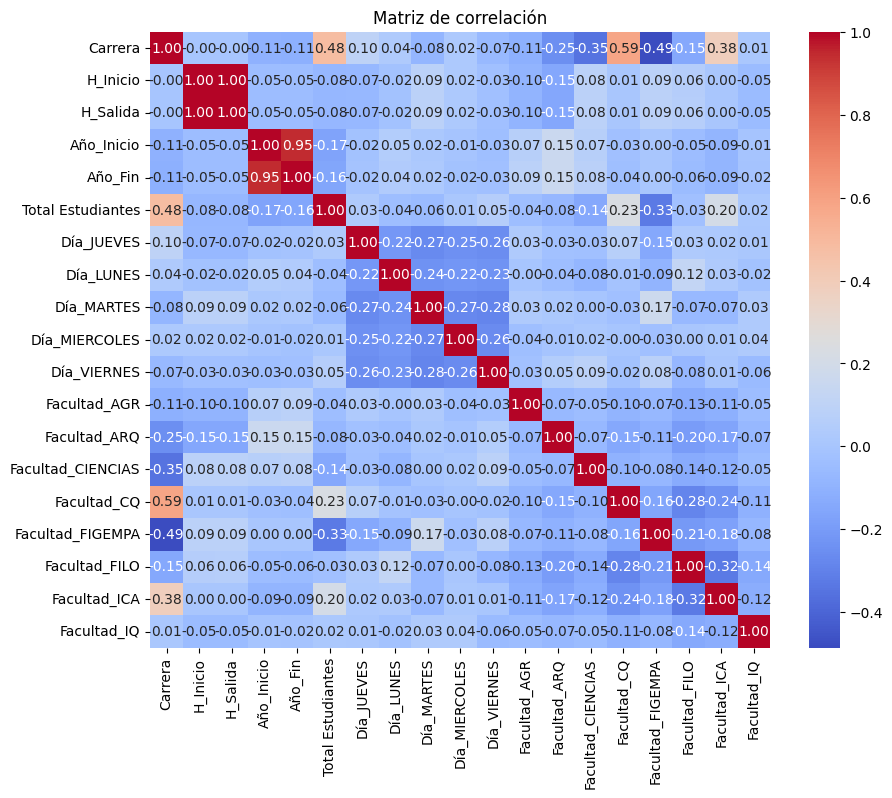

In [ ]:
#visualizamos la matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Especifica tu variable objetivo
target = 'Total Estudiantes'

# Calcular la correlación de todas las variables con respecto a la variable objetivo
correlaciones = df_encoded.corr(numeric_only=True)[target].sort_values(ascending=False)

# Definir umbrales de alta y baja correlación (ajustables)
umbral_alta = 0.5
umbral_baja = 0.1

# Filtrar las variables con alta y baja correlación
alta_corr = correlaciones[abs(correlaciones) >= umbral_alta]
baja_corr = correlaciones[(abs(correlaciones) > 0) & (abs(correlaciones) <= umbral_baja)]

# Mostrar resultados
print("🔹 Variables con ALTA correlación:")
print(alta_corr)

print("\n🔸 Variables con BAJA correlación:")
print(baja_corr)

🔹 Variables con ALTA correlación:
Total Estudiantes    1.0
Name: Total Estudiantes, dtype: float64

🔸 Variables con BAJA correlación:
Día_VIERNES      0.054672
Día_JUEVES       0.031449
Facultad_IQ      0.018646
Día_MIERCOLES    0.012165
Facultad_FILO   -0.030081
Facultad_AGR    -0.040925
Día_LUNES       -0.040944
Día_MARTES      -0.058527
Facultad_ARQ    -0.077905
H_Inicio        -0.077966
H_Salida        -0.078382
Name: Total Estudiantes, dtype: float64


In [ ]:
# Conjunto de validación: Año_Inicio = 2024 y Año_Fin = 2025
df_val = df_encoded[(df_encoded['Año_Inicio'] == 2024) & (df_encoded['Año_Fin'] == 2025)]

# Conjunto de entrenamiento: todos los demás
df_train = df_encoded[~((df_new['Año_Inicio'] == 2024) & (df_encoded['Año_Fin'] == 2025))]

In [ ]:
df_train.head()

Carrera  H_Inicio  H_Salida  Año_Inicio  Año_Fin  Total Estudiantes  \
0  42.894478       7.0       9.0        2020     2020                 63   
1  42.894478       7.0       9.0        2020     2020                 68   
2  39.012245      11.0      13.0        2020     2020                 17   
3  32.769212       8.0      10.0        2020     2020                  6   
4  33.868364       7.0       9.0        2020     2020                 19   

   Día_JUEVES  Día_LUNES  Día_MARTES  Día_MIERCOLES  Día_VIERNES  \
0        True      False       False          False        False   
1       False      False       False           True        False   
2        True      False       False          False        False   
3       False      False       False          False         True   
4       False      False        True          False        False   

   Facultad_AGR  Facultad_ARQ  Facultad_CIENCIAS  Facultad_CQ  \
0         False         False              False        False   
1         False         False              False        False   
2         False         False              False        False   
3         False         False              False        False   
4         False          True              False        False   

   Facultad_FIGEMPA  Facultad_FILO  Facultad_ICA  Facultad_IQ  
0             False          False          True        False  
1             False          False          True        False  
2             False          False          True        False  
3             False           True         False        False  
4             False          False         False        False

In [ ]:
# preparamos los datos para el modelo

from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df_train.drop(columns=['Total Estudiantes'])
y = df_train['Total Estudiantes']

# División del 80% para entrenamiento y 20% para prueba interna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Detectar columnas numéricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Inicializar escalador
scaler = StandardScaler()

# Escalar numéricos de forma segura
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

modelos = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Regresión Lineal': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Red Neuronal (MLP)': MLPRegressor(random_state=42, max_iter=1000),
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada con datos ESCALADOS
print("Evaluación de modelos (MAE promedio):\n")
for nombre, modelo in modelos.items():
    try:
        scores = cross_val_score(modelo, X_train_scaled, y_train, cv=kfold, scoring=make_scorer(mean_absolute_error), n_jobs=-1)
        print(f"{nombre:25s} → MAE: {np.mean(scores):.2f} ± {np.std(scores):.2f}")
    except Exception as e:
        print(f"{nombre:25s} → Error: {str(e)}")


Evaluación de modelos (MAE promedio):

Random Forest             → MAE: 9.84 ± 0.48
Gradient Boosting         → MAE: 9.96 ± 0.63
Regresión Lineal          → MAE: 10.04 ± 0.83
KNN                       → MAE: 10.29 ± 0.74
SVR                       → MAE: 10.28 ± 0.91
Red Neuronal (MLP)        → MAE: 10.07 ± 0.62


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Espacio completo de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Modelo base
rf = RandomForestRegressor(random_state=42)

# Validación cruzada con 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search con MAE como métrica
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Ejecutar búsqueda
grid_search_rf.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search_rf.best_estimator_

print("\n Mejor modelo encontrado con GridSearchCV:")
print(best_rf_model)

# MAE negativo se vuelve positivo
best_mae = -grid_search_rf.best_score_
print(f"\n MAE promedio (validación cruzada): {best_mae:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

 Mejor modelo encontrado con GridSearchCV:
RandomForestRegressor(max_depth=10, max_features=None, min_samples_split=10,
                      random_state=42)

 MAE promedio (validación cruzada): 9.63


In [ ]:
# Obtener resultados completos como DataFrame
resultados = pd.DataFrame(grid_search_rf.cv_results_['params'])
resultados['MAE'] = -grid_search_rf.cv_results_['mean_test_score']  # revertir signo
resultados = resultados.sort_values(by='MAE')  # ordenar de menor a mayor error

# Mostrar las 5 mejores combinaciones
print(resultados.head())

     max_depth max_features  min_samples_leaf  min_samples_split  \
141       10.0         None                 1                 10   
143       10.0         None                 1                 10   
224       20.0         None                 1                 10   
62         NaN         None                 1                 10   
305       30.0         None                 1                 10   

     n_estimators       MAE  
141           100  9.631864  
143           300  9.633914  
224           300  9.637419  
62            300  9.637419  
305           300  9.637419  


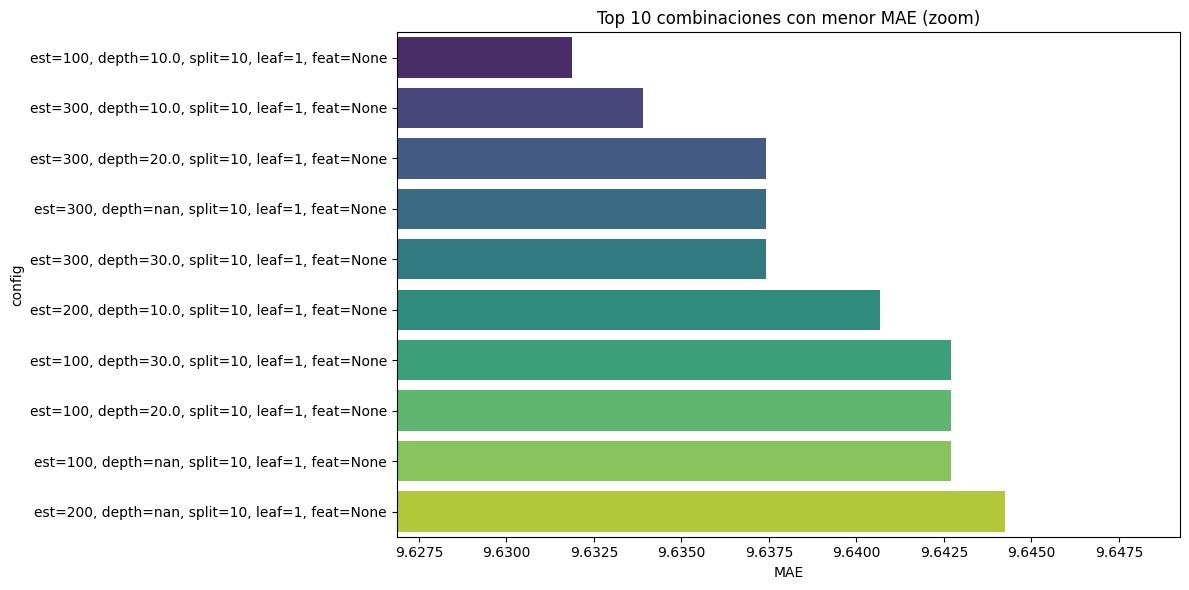

In [ ]:
# Ordenar por MAE y seleccionar top 10
top_10 = resultados.sort_values(by='MAE').head(10).copy()

# Crear etiquetas legibles
top_10['config'] = top_10.apply(lambda row: f"est={row['n_estimators']}, depth={row['max_depth']}, "
                                            f"split={row['min_samples_split']}, leaf={row['min_samples_leaf']}, "
                                            f"feat={row['max_features']}", axis=1)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='MAE', y='config', data=top_10, hue='config', palette='viridis', legend=False)
plt.xlim(top_10['MAE'].min() - 0.005, top_10['MAE'].max() + 0.005)
plt.xlabel('MAE')
plt.title('Top 10 combinaciones con menor MAE (zoom)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Usar el mejor modelo obtenido del RandomizedSearchCV
modelo_final_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features= None,
    random_state=42
)

# Entrenar el modelo con todos los datos de entrenamiento
modelo_final_rf.fit(X_train_scaled, y_train)

y_pred_rf = modelo_final_rf.predict(X_test_scaled)
# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar resultados
print(" Métricas del modelo Random Forest:")
print(f"MAE  (Error absoluto medio):      {mae_rf:.2f}")
print(f"RMSE (Raíz del error cuadrático): {rmse_rf:.2f}")
print(f"R²   (Coeficiente de determinación): {r2_rf:.2f}")


 Métricas del modelo Random Forest:
MAE  (Error absoluto medio):      10.12
RMSE (Raíz del error cuadrático): 13.31
R²   (Coeficiente de determinación): 0.29


In [ ]:
import joblib

# Guardar el modelo y el escalador
joblib.dump(modelo_final_rf, 'm_f_estudiantes.pkl')
joblib.dump(scaler, 'escalador_estus.pkl')

print("Modelo y escalador guardados exitosamente.")

Modelo y escalador guardados exitosamente.


In [ ]:
# Cargar modelo y escalador
modelo_final = joblib.load('m_f_estudiantes.pkl')
scaler = joblib.load('escalador_estus.pkl')

In [ ]:
# Separar variables y objetivo
X_val = df_val.drop(columns=['Total Estudiantes'])
y_val = df_val['Total Estudiantes']

# Detectar columnas numéricas
num_cols = X_val.select_dtypes(include=['int64', 'float64']).columns

# Aplicar el escalado a las columnas numéricas
X_val_scaled = X_val.copy()
X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])

In [ ]:
# Predecir con el modelo cargado
y_pred_val = modelo_final.predict(X_val_scaled)

mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

print("Evaluación con el conjunto de validación (2024–2025):")
print(f"MAE  (Error absoluto medio):      {mae_val:.2f}")
print(f"RMSE (Raíz del error cuadrático): {rmse_val:.2f}")
print(f"R²   (Coeficiente de determinación): {r2_val:.2f}")

Evaluación con el conjunto de validación (2024–2025):
MAE  (Error absoluto medio):      8.32
RMSE (Raíz del error cuadrático): 10.48
R²   (Coeficiente de determinación): 0.10


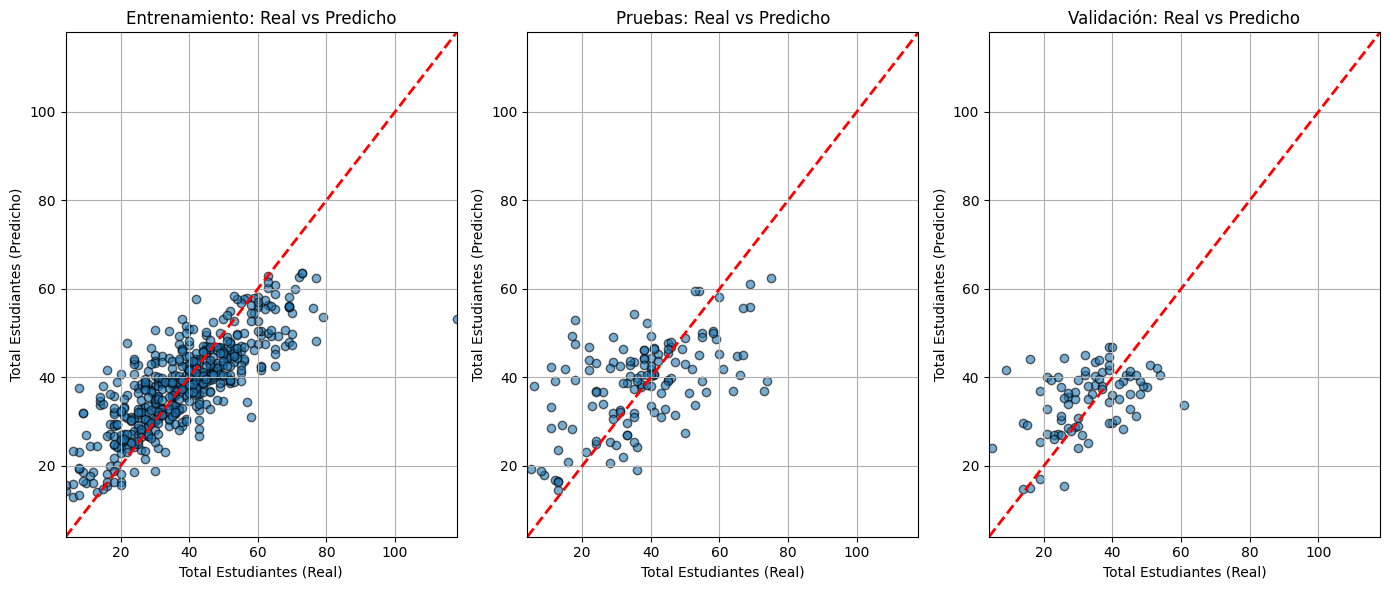

In [ ]:
# Generar predicciones
y_pred_train = modelo_final.predict(X_train_scaled)
y_pred_test = modelo_final.predict(X_test_scaled)

# Calcular los límites globales para los ejes
min_val = min(y_train.min(), y_test.min(), y_pred_train.min(), y_pred_test.min())
max_val = max(y_train.max(), y_test.max(), y_pred_train.max(), y_pred_test.max())

# Crear figura con dos subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

# === Gráfico 1: Entrenamiento ===
axes[0].scatter(y_train, y_pred_train, alpha=0.6, edgecolors='k')
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0].set_xlim(min_val, max_val)
axes[0].set_ylim(min_val, max_val)
axes[0].set_xlabel("Total Estudiantes (Real)")
axes[0].set_ylabel("Total Estudiantes (Predicho)")
axes[0].set_title("Entrenamiento: Real vs Predicho")
axes[0].grid(True)

# === Gráfico 2: Validación/Test ===
axes[1].scatter(y_test, y_pred_test, alpha=0.6, edgecolors='k')
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1].set_xlim(min_val, max_val)
axes[1].set_ylim(min_val, max_val)
axes[1].set_xlabel("Total Estudiantes (Real)")
axes[1].set_ylabel("Total Estudiantes (Predicho)")
axes[1].set_title("Pruebas: Real vs Predicho")
axes[1].grid(True)

# === Gráfico 3: Validación/Test ===
axes[2].scatter(y_val, y_pred_val, alpha=0.6, edgecolors='k')
axes[2].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[2].set_xlim(min_val, max_val)
axes[2].set_ylim(min_val, max_val)
axes[2].set_xlabel("Total Estudiantes (Real)")
axes[2].set_ylabel("Total Estudiantes (Predicho)")
axes[2].set_title("Validación: Real vs Predicho")
axes[2].grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Crear DataFrame con resultados
df_estudiantes_final = df_val.copy()
df_estudiantes_final['Estudiantes_Predichos'] = y_pred_val
df_estudiantes_final['Error_Absoluto'] = np.abs(df_estudiantes_final['Total Estudiantes'] - df_estudiantes_final['Estudiantes_Predichos'])

# Error porcentual relativo
df_estudiantes_final['Error_Porcentual (%)'] = (df_estudiantes_final['Error_Absoluto'] / df_estudiantes_final['Total Estudiantes']) * 100


# Mostrar primeras filas
print(df_estudiantes_final[['Total Estudiantes', 'Estudiantes_Predichos', 'Error_Absoluto']].head())

     Total Estudiantes  Estudiantes_Predichos  Error_Absoluto
531                 19              36.882769       17.882769
532                 50              37.787411       12.212589
533                 39              44.528958        5.528958
534                 35              40.431448        5.431448
535                 35              43.559755        8.559755


In [ ]:
print("\n Estadísticas de error:")
print(df_estudiantes_final[['Error_Absoluto', 'Error_Porcentual (%)']].describe())


 Estadísticas de error:
       Error_Absoluto  Error_Porcentual (%)
count       82.000000             82.000000
mean         8.315667             35.530944
std          6.416018             60.534515
min          0.193272              0.690258
25%          3.644343              9.938112
50%          6.960594             20.911549
75%         10.893402             31.743128
max         32.696654            381.726643


In [ ]:
print("\n Top 5 casos con mayor error absoluto:")
print(df_estudiantes_final.sort_values(by='Error_Absoluto', ascending=False).head(5)[
    ['Total Estudiantes', 'Estudiantes_Predichos', 'Error_Absoluto', 'Error_Porcentual (%)']
])


 Top 5 casos con mayor error absoluto:
     Total Estudiantes  Estudiantes_Predichos  Error_Absoluto  \
598                  9              41.696654       32.696654   
551                 16              44.213952       28.213952   
612                 61              33.717363       27.282637   
603                  5              24.086332       19.086332   
546                 21              40.022780       19.022780   

     Error_Porcentual (%)  
598            363.296152  
551            176.337198  
612             44.725635  
603            381.726643  
546             90.584665  


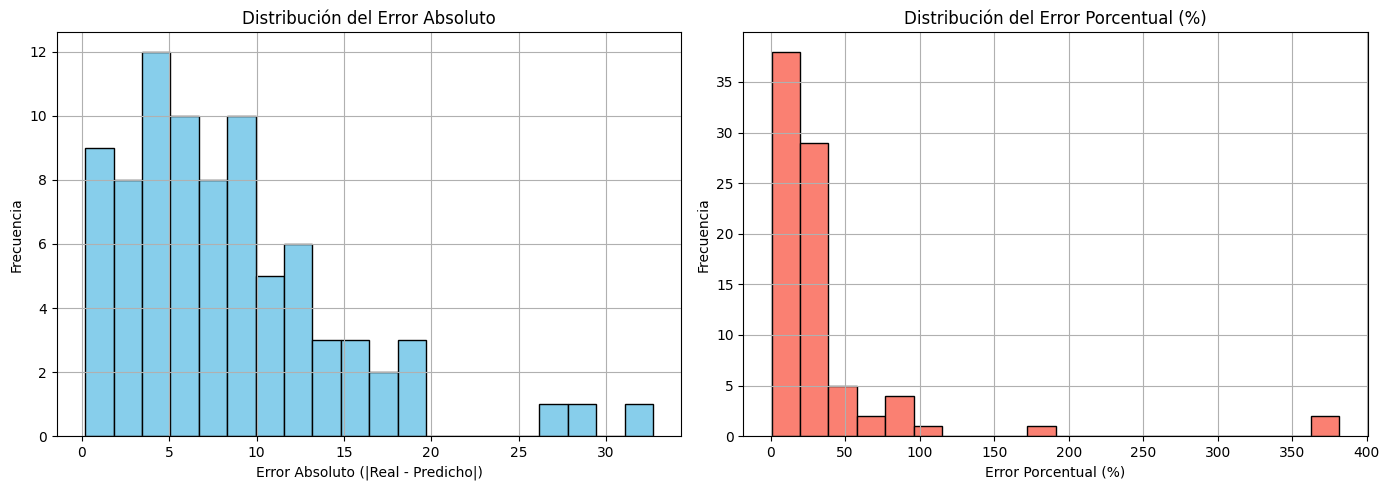

In [ ]:
# Crear figura con 2 subplots en una sola fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# --- Histograma del Error Absoluto ---
axes[0].hist(df_estudiantes_final['Error_Absoluto'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title("Distribución del Error Absoluto")
axes[0].set_xlabel("Error Absoluto (|Real - Predicho|)")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(True)

# --- Histograma del Error Porcentual ---
axes[1].hist(df_estudiantes_final['Error_Porcentual (%)'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title("Distribución del Error Porcentual (%)")
axes[1].set_xlabel("Error Porcentual (%)")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()